<a href="https://colab.research.google.com/github/pankaj140699/Traffic_Flow_Prediction/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Creating files

In [2]:
#Importing libraries
import pandas as pd
from sklearn import preprocessing
import datetime
import numpy as np
import os
import requests
import json
from time import sleep
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential
import math
import warnings
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
#Data Preprocessing
#File Creation
for i in range(1,10):
  filename = 'd05_text_station_5min_2021_03_0{}.csv'.format(i)

  #loading data
  df = pd.read_csv('/content/drive/MyDrive/Data/'+ filename,header=None)

  #Dropping columns with all null values
  df.drop(columns =[x for x in range(18,52)],inplace=True)

  #Naming the columns
  df.columns = ['Timestamp','Station','District','Freeway','Direction of Travel','Lane Type','Station Length','Samples',
              '% Observed','Total Flow','Avg Occupancy','Avg Speed','Lane N Samples','Lane N Flow','Lane N Avg Occ',
              'Lane N','Avg Speed_1','Lane N Observed']
  
  #Filtering LANE-TYPE
  filt = (df['Lane Type'] == 'ML')
  df = df[filt]
  df.reset_index(inplace=True)

  #Dropping columns having no relevance
  df.drop(columns =['District','Freeway','Lane Type','Station Length','Samples','% Observed','Lane N Samples',
                    'Lane N','Avg Speed_1','Lane N Flow','Lane N Avg Occ','Lane N Observed'],inplace = True)
  df.drop(columns=['index','Direction of Travel'],inplace=True)
  k = df['Station'].nunique() #Unique Sensors 
  print(k)
  with open('/content/drive/MyDrive/Data Files/File1.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Total Flow'].values.astype(str))
      file1.write(row+'\n')
  with open('/content/drive/MyDrive/Data Files/File2.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Avg Occupancy'].values.astype(str))
      file1.write(row+'\n')  
  with open('/content/drive/MyDrive/Data Files/File3.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Avg Speed'].values.astype(str))
      file1.write(row+'\n')      

374


FileNotFoundError: ignored

In [ ]:
df.head(10)

,Timestamp,Station,Total Flow,Avg Occupancy,Avg Speed
0,03/09/2021 00:00:00,500010011,1.0,0.0010,65.0
1,03/09/2021 00:00:00,500010012,2.0,0.0018,65.0
2,03/09/2021 00:00:00,500010021,3.0,0.0019,69.2
3,03/09/2021 00:00:00,500010022,4.0,0.0037,65.0
4,03/09/2021 00:00:00,500010031,8.0,0.0040,66.6
5,03/09/2021 00:00:00,500010032,8.0,0.0082,65.0
6,03/09/2021 00:00:00,500010041,11.0,0.0054,66.8
7,03/09/2021 00:00:00,500010042,9.0,0.0047,68.5
8,03/09/2021 00:00:00,500010051,7.0,0.0034,66.8
9,03/09/2021 00:00:00,500010052,6.0,0.0027,68.2


In [ ]:
#Data Preprocessing
#File Creation
for i in range(10,32): #CHANGE HERE
  filename = 'd05_text_station_5min_2021_03_{}.csv'.format(i)

  #loading data
  df = pd.read_csv('/content/drive/MyDrive/Data/'+ filename,header=None)

  #Dropping columns with all null values
  df.drop(columns =[x for x in range(18,52)],inplace=True)

  #Naming the columns
  df.columns = ['Timestamp','Station','District','Freeway','Direction of Travel','Lane Type','Station Length','Samples',
              '% Observed','Total Flow','Avg Occupancy','Avg Speed','Lane N Samples','Lane N Flow','Lane N Avg Occ',
              'Lane N','Avg Speed_1','Lane N Observed']
  
  #Filtering LANE-TYPE
  filt = (df['Lane Type'] == 'ML')
  df = df[filt]
  df.reset_index(inplace=True)

  #Dropping columns having no relevance
  df.drop(columns =['District','Freeway','Lane Type','Station Length','Samples','% Observed','Lane N Samples',
                    'Lane N','Avg Speed_1','Lane N Flow','Lane N Avg Occ','Lane N Observed'],inplace = True)
  df.drop(columns=['index','Direction of Travel'],inplace=True)
  k = df['Station'].nunique() #Unique Sensors 
  print(k)
  with open('/content/drive/MyDrive/Data Files/File1.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Total Flow'].values.astype(str))
      file1.write(row+'\n')
  with open('/content/drive/MyDrive/Data Files/File2.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Avg Occupancy'].values.astype(str))
      file1.write(row+'\n')  
  with open('/content/drive/MyDrive/Data Files/File3.csv','a') as file1:
    for i in range(288):
      row = ",".join(df[k*i:k*(i+1)]['Avg Speed'].values.astype(str))
      file1.write(row+'\n')      

In [ ]:
data=pd.read_excel('/content/Total Flow1.xls',header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374
0,2021-03-01,3,1,4,2,1,6,2,5,4,4,10,8,7,10,14,7,11,13,14,10,11,16,10,17,10,18,18,11,25,12,22,28,23,23,17,5,8,6,9,...,7.0,4.0,6.0,9.0,6.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,15.0,5.0,1.0,5.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,6.0,6.0,2.0,6.0,2.0,6.0,3.0,5.0,2.0,3.0,2.0
1,2021-03-01,1,1,1,1,10,1,8,2,0,0,10,5,6,9,7,6,5,9,11,3,4,10,4,10,7,14,10,7,12,9,11,17,18,11,12,7,8,4,8,...,5.0,5.0,3.0,4.0,3.0,2.0,4.0,5.0,2.0,3.0,3.0,1.0,15.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,5.0,2.0,3.0,5.0,6.0,3.0,3.0,3.0,1.0,2.0,0.0,1.0,3.0,0.0,6.0,1.0,1.0,5.0
2,2021-03-01,0,1,0,1,6,3,5,3,6,4,5,6,4,5,8,7,10,8,10,9,10,12,10,12,5,11,12,5,8,6,6,11,14,8,12,3,8,1,4,...,3.0,2.0,5.0,8.0,5.0,5.0,2.0,2.0,1.0,3.0,5.0,4.0,15.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,1.0,2.0,2.0,1.0,0.0,3.0,4.0,0.0,0.0,4.0,7.0,1.0,8.0,2.0,9.0,2.0,8.0,0.0,0.0,9.0
3,2021-03-01,0,0,0,1,2,5,4,5,2,3,7,6,7,7,7,5,2,7,7,3,3,7,0,6,1,11,11,1,14,4,9,20,14,7,11,5,7,4,6,...,8.0,5.0,9.0,6.0,7.0,2.0,1.0,3.0,2.0,4.0,4.0,3.0,14.0,2.0,1.0,2.0,3.0,1.0,4.0,5.0,6.0,3.0,6.0,5.0,4.0,6.0,6.0,3.0,1.0,8.0,8.0,2.0,7.0,1.0,5.0,0.0,4.0,1.0,0.0,6.0
4,2021-03-01,0,1,0,1,3,2,3,0,4,2,4,1,0,4,7,0,1,6,5,0,1,8,1,9,4,11,8,3,9,5,7,15,19,6,11,3,6,4,8,...,2.0,6.0,1.0,7.0,5.0,7.0,1.0,3.0,4.0,2.0,4.0,3.0,17.0,5.0,2.0,5.0,4.0,1.0,5.0,0.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,3.0,4.0,4.0,5.0,5.0,6.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8916 entries, 0 to 8915
Columns: 374 entries, 1 to 374
dtypes: float64(130), int64(244)
memory usage: 25.4 MB


In [1]:
data=data.drop(columns=[0])

NameError: ignored

In [ ]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374
0,3,1,4,2,1,6,2,5,4,4,10,8,7,10,14,7,11,13,14,10,11,16,10,17,10,18,18,11,25,12,22,28,23,23,17,5,8,6,9,5,...,7.0,4.0,6.0,9.0,6.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,15.0,5.0,1.0,5.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,6.0,6.0,2.0,6.0,2.0,6.0,3.0,5.0,2.0,3.0,2.0
1,1,1,1,1,10,1,8,2,0,0,10,5,6,9,7,6,5,9,11,3,4,10,4,10,7,14,10,7,12,9,11,17,18,11,12,7,8,4,8,4,...,5.0,5.0,3.0,4.0,3.0,2.0,4.0,5.0,2.0,3.0,3.0,1.0,15.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,5.0,2.0,3.0,5.0,6.0,3.0,3.0,3.0,1.0,2.0,0.0,1.0,3.0,0.0,6.0,1.0,1.0,5.0
2,0,1,0,1,6,3,5,3,6,4,5,6,4,5,8,7,10,8,10,9,10,12,10,12,5,11,12,5,8,6,6,11,14,8,12,3,8,1,4,7,...,3.0,2.0,5.0,8.0,5.0,5.0,2.0,2.0,1.0,3.0,5.0,4.0,15.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,1.0,2.0,2.0,1.0,0.0,3.0,4.0,0.0,0.0,4.0,7.0,1.0,8.0,2.0,9.0,2.0,8.0,0.0,0.0,9.0
3,0,0,0,1,2,5,4,5,2,3,7,6,7,7,7,5,2,7,7,3,3,7,0,6,1,11,11,1,14,4,9,20,14,7,11,5,7,4,6,5,...,8.0,5.0,9.0,6.0,7.0,2.0,1.0,3.0,2.0,4.0,4.0,3.0,14.0,2.0,1.0,2.0,3.0,1.0,4.0,5.0,6.0,3.0,6.0,5.0,4.0,6.0,6.0,3.0,1.0,8.0,8.0,2.0,7.0,1.0,5.0,0.0,4.0,1.0,0.0,6.0
4,0,1,0,1,3,2,3,0,4,2,4,1,0,4,7,0,1,6,5,0,1,8,1,9,4,11,8,3,9,5,7,15,19,6,11,3,6,4,8,4,...,2.0,6.0,1.0,7.0,5.0,7.0,1.0,3.0,4.0,2.0,4.0,3.0,17.0,5.0,2.0,5.0,4.0,1.0,5.0,0.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,3.0,4.0,4.0,5.0,5.0,6.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0


In [ ]:
data.shape

(8916, 374)

SENSOR SELECTION

In [ ]:
arr=np.zeros((1866,3))

In [ ]:
topsis_table=pd.DataFrame(arr,columns=['corelation','distance','avg_occ'])

In [ ]:
topsis_table=topsis_table.drop(0)

In [ ]:
topsis_table.head()

,corelation,distance,avg_occ
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0


In [ ]:
topsis_table.shape

(1865, 3)

corelation

In [ ]:
no_of_days=data.shape[0]//288
time_interval=[8,3,6,3,4] #in hrs
init=[0]  #store total_time till that gro starting
sum=init[0]
for i in range(len(time_interval)-1):
  sum=sum+time_interval[i]
  init.append(sum)
# print(init)
for j in range(0,len(init)):
  # avg_occ=grouping(avg_occ,init[i]*12,time_interval[i])
  corelation_merged=pd.DataFrame(columns=data.columns)
  for i in range(0,no_of_days):
      corelation_merged=pd.concat([corelation_merged,data.loc[init[j]*12+288*i:(init[j]*12+288*i)+time_interval[j]*12,:]])
  # corelation_merged.drop(columns=[1],inplace=True)
  corelation_merged=corelation_merged.astype(float)
  # print(corelation_merged.head())
  # print(corelation_merged.corr()[1])
  # print(corelation_merged.shape)
  # print(type(corelation_merged.mean()))
  topsis_table.loc[373*j+1:373*j+373,'corelation']=np.array(corelation_merged.corr()[1].loc[2:])
        # avg_occ.loc[init[j]*12+288*i:(init[j]*12+288*i)+time_interval[j]*12,:].fillna(avg_occ.loc[init[j]*12+288*i:(init[j]*12+288*i)+time_interval[j]*12,:].mean(),inplace=True)

In [ ]:
topsis_table.head(748)

,corelation,distance,avg_occ
1,0.678605,0.0,0.0
2,0.844172,0.0,0.0
3,0.875294,0.0,0.0
4,0.620867,0.0,0.0
5,0.745612,0.0,0.0
...,...,...,...
744,0.687958,0.0,0.0
745,0.678888,0.0,0.0
746,0.744639,0.0,0.0
747,0.840698,0.0,0.0


Distance

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/metadata.xlsx',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,500010011,1,N,5,53,NaN,72.33,322.865,36.535850,-121.912881,2.713,ML,1,CARMEL RIV BRIDGE HWY 1 NB VDS M,1
1,500010012,1,S,5,53,NaN,72.331,322.800,36.535860,-121.912870,2.714,ML,1,CARMEL RIV BRIDGE HWY 1 NB VDS M,1
2,500010021,1,N,5,53,NaN,72.757,323.292,36.541075,-121.908778,0.697,ML,2,CARMEL VALLEY RD HWY 1 NB VDS ML,1
3,500010022,1,S,5,53,NaN,72.758,323.227,36.541106,-121.908820,0.698,ML,1,CARMEL VALLEY RD HWY 1 NB VDS ML,1
4,500010031,1,N,5,53,NaN,73.726,324.261,36.554647,-121.910926,0.831,ML,2,OCEAN AVE HWY 1 NB VDS MLNB NB,1


In [ ]:
df=df[df[11]=='ML']
df.shape

(374, 15)

In [ ]:
df11=pd.DataFrame()
df11=df11.append(df.iloc[:,[0,9,8]],ignore_index=True)
df11.columns=['sensor_id','longi','lati']

In [ ]:
df11.head()

,sensor_id,longi,lati
0,500010011,-121.912881,36.535850
1,500010012,-121.912870,36.535860
2,500010021,-121.908778,36.541075
3,500010022,-121.908820,36.541106
4,500010031,-121.910926,36.554647


In [ ]:
df11.shape

(374, 3)

In [ ]:
headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Authorization': '5b3ce3597851110001cf6248536ef0af8e964986a3e9dbdf82145e52',
    'Content-Type': 'application/json; charset=utf-8'
}
def calculate_distance(df11,i):
  # longi1=str(longi1)
  # lati1=str(lati1)
  # longi2=str(longi2)
  # lati2=str(lati2)
  longi=np.array(df11['longi'])
  longi=np.expand_dims(longi,1)
  
  lati=np.array(df11['lati'])
  lati=np.expand_dims(lati,1)
  locat=np.concatenate((longi,lati),axis=1)
  body = {"locations":locat.tolist(),'metrics':['distance'],'units':'km','sources':[i]}
  call = requests.post('https://api.openrouteservice.org/v2/matrix/driving-car',json=body, headers=headers)
  # print(call.status_code, call.reason)
  c=call.text
  # print(c)
  # print(call.text)
  res = json.loads(c)
  # print(type(res['distances'][0]))
  dist=res['distances'][0]
  return dist

In [ ]:
arr=np.zeros((374,374))
dist=pd.DataFrame(arr)

In [ ]:
c=0
for i in range(dist.shape[0]):
    c+=1
    if(c%40==0):     
      sleep(60) # Time in seconds
    dist[i]=calculate_distance(df11,i)

KeyboardInterrupt: ignored

In [ ]:
dist.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.00,0.00,0.69,0.69,2.24,2.24,3.35,3.35,7.58,4.27,11.22,5.23,6.29,6.29,8.99,7.46,8.58,11.30,9.21,9.20,9.66,10.20,10.04,11.43,10.80,11.95,15.42,11.63,21.53,13.11,14.03,20.59,19.73,14.90,22.43,17.09,22.41,19.30,25.47,20.38,...,58.73,59.81,59.81,65.27,65.27,66.30,66.30,68.61,73.48,73.49,78.38,78.38,11.40,11.42,10.18,10.18,11.99,11.99,14.57,14.57,17.45,17.47,19.35,19.36,20.64,20.65,22.13,22.13,23.56,23.57,24.61,24.61,26.33,26.33,29.00,29.00,33.48,33.47,32.74,32.74
1,0.00,0.00,0.69,0.69,2.24,2.24,3.35,3.35,7.58,4.27,11.22,5.23,6.29,6.29,8.99,7.46,8.57,11.30,9.20,9.20,9.66,10.20,10.04,11.43,10.79,11.95,15.42,11.63,21.52,13.11,14.03,20.59,19.73,14.90,22.43,17.09,22.41,19.30,25.47,20.38,...,58.73,59.81,59.81,65.27,65.27,66.30,66.30,68.61,73.48,73.48,78.38,78.38,11.40,11.41,10.18,10.18,11.99,11.99,14.57,14.57,17.45,17.47,19.35,19.35,20.64,20.65,22.13,22.13,23.56,23.56,24.60,24.61,26.32,26.33,29.00,29.00,33.47,33.47,32.74,32.74
2,0.69,0.69,0.00,0.00,1.55,1.55,2.66,2.66,6.89,3.58,10.53,4.54,5.60,5.60,8.30,6.77,7.89,10.61,8.52,8.51,8.97,9.51,9.35,10.74,10.10,11.26,14.73,10.94,20.83,12.42,13.34,19.90,19.04,14.21,21.74,16.40,21.72,18.61,24.78,19.69,...,58.04,59.12,59.12,64.58,64.58,65.61,65.61,67.92,72.79,72.79,77.69,77.69,10.71,10.72,9.49,9.49,11.30,11.30,13.88,13.88,16.76,16.78,18.66,18.67,19.95,19.96,21.44,21.44,22.87,22.88,23.92,23.92,25.63,25.64,28.31,28.31,32.78,32.78,32.05,32.05
3,0.69,0.69,0.00,0.00,1.55,1.55,2.66,2.66,6.89,3.57,10.53,4.54,5.60,5.60,8.30,6.77,7.88,10.61,8.51,8.51,8.97,9.51,9.35,10.74,10.10,11.26,14.73,10.94,20.83,12.42,13.34,19.90,19.04,14.21,21.74,16.40,21.72,18.60,24.78,19.69,...,58.04,59.12,59.12,64.58,64.58,65.61,65.61,67.92,72.79,72.79,77.69,77.69,10.71,10.72,9.49,9.49,11.30,11.30,13.88,13.88,16.76,16.78,18.66,18.66,19.95,19.95,21.44,21.44,22.87,22.87,23.91,23.92,25.63,25.64,28.31,28.31,32.78,32.78,32.05,32.05
4,2.24,2.24,1.55,1.55,0.00,0.00,1.11,1.11,5.34,2.03,8.98,2.99,4.05,4.05,6.75,5.22,6.33,9.06,6.96,6.96,7.42,7.96,7.80,9.19,8.55,9.71,13.18,9.39,19.28,10.87,11.79,18.35,17.49,12.66,20.19,14.85,20.17,17.06,23.23,18.14,...,56.49,57.57,57.57,63.03,63.03,64.06,64.06,66.37,71.24,71.24,76.14,76.14,9.16,9.17,7.94,7.94,9.75,9.75,12.33,12.33,15.21,15.23,17.11,17.11,18.40,18.41,19.89,19.89,21.32,21.32,22.36,22.37,24.08,24.09,26.76,26.76,31.23,31.23,30.50,30.50
5,2.24,2.24,1.55,1.55,0.00,0.00,1.11,1.11,5.34,2.02,8.98,2.99,4.05,4.05,6.75,5.22,6.33,9.06,6.96,6.96,7.42,7.96,7.80,9.19,8.55,9.71,13.18,9.39,19.28,10.87,11.79,18.35,17.49,12.65,20.19,14.85,20.17,17.05,23.23,18.14,...,56.49,57.57,57.56,63.03,63.03,64.06,64.06,66.37,71.24,71.24,76.14,76.14,9.16,9.17,7.93,7.94,9.74,9.75,12.33,12.33,15.21,15.23,17.11,17.11,18.40,18.40,19.89,19.89,21.32,21.32,22.36,22.37,24.08,24.08,26.76,26.76,31.23,31.23,30.50,30.49
6,3.35,3.35,2.66,2.66,1.11,1.11,0.00,0.00,4.23,0.92,7.87,1.88,2.94,2.94,5.64,4.11,5.23,7.95,5.86,5.85,6.31,6.85,6.69,8.08,7.45,8.60,12.07,8.28,18.18,9.76,10.69,17.24,16.38,11.55,19.08,13.74,19.06,15.95,22.12,17.04,...,55.38,56.46,56.46,61.92,61.92,62.95,62.95,65.26,70.13,70.14,75.03,75.03,8.05,8.07,6.83,6.83,8.64,8.64,11.22,11.22,14.11,14.12,16.01,16.01,17.30,17.30,18.78,18.78,20.22,20.22,21.26,21.26,22.98,22.98,25.65,25.65,30.13,30.12,29.39,29.39
7,3.35,3.35,2.66,2.66,1.11,1.11,0.00,0.00,4.23,0.92,7.87,1.88,2.94,2.94,5.64,4.11,5.23,7.95,5.86,5.85,6.31,6.85,6.69,8.08,7.44,8.60,12.07,8.28,18.17,9.76,10.68,17.24,16.38,11.55,19.08,13.74,19.06,15.95,22.12,17.03,...,55.38,56.46,56.46,61.92,61.92,62.95,62.95,65.26,70.13,70.13,75.03,75.03,8.05,8.06,6.83,6.83,8.64,8.64,11.22,11.22,14.10,14.12,16.00,16.01,17.29,17.30,18.78,18.78,20.21,20.22,21.26,21.26,22.97,22.98,25.65,25.65,30.12,30.12,29.39,29.39
8,4.26,4.26,3.57,3.57,2.02,2.02,0.91,0.91,0.00,1.02,7.9

In [ ]:
dist.to_csv('distance_sensors.csv',index=False)

In [ ]:
dist=pd.read_csv('/content/distance_sensors.csv')

In [ ]:
dist.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '364', '365', '366', '367', '368', '369', '370', '371', '372', '373'],
      dtype='object', length=374)

In [ ]:
dist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.00,0.00,0.69,0.69,2.24,2.24,3.35,3.35,7.58,4.27,11.22,5.23,6.29,6.29,8.99,7.46,8.58,11.30,9.21,9.20,9.66,10.20,10.04,11.43,10.80,11.95,15.42,11.63,21.53,13.11,14.03,20.59,19.73,14.90,22.43,17.09,22.41,19.30,25.47,20.38,...,58.73,59.81,59.81,65.27,65.27,66.30,66.30,68.61,73.48,73.49,78.38,78.38,11.40,11.42,10.18,10.18,11.99,11.99,14.57,14.57,17.45,17.47,19.35,19.36,20.64,20.65,22.13,22.13,23.56,23.57,24.61,24.61,26.33,26.33,29.00,29.00,33.48,33.47,32.74,32.74
1,0.00,0.00,0.69,0.69,2.24,2.24,3.35,3.35,7.58,4.27,11.22,5.23,6.29,6.29,8.99,7.46,8.57,11.30,9.20,9.20,9.66,10.20,10.04,11.43,10.79,11.95,15.42,11.63,21.52,13.11,14.03,20.59,19.73,14.90,22.43,17.09,22.41,19.30,25.47,20.38,...,58.73,59.81,59.81,65.27,65.27,66.30,66.30,68.61,73.48,73.48,78.38,78.38,11.40,11.41,10.18,10.18,11.99,11.99,14.57,14.57,17.45,17.47,19.35,19.35,20.64,20.65,22.13,22.13,23.56,23.56,24.60,24.61,26.32,26.33,29.00,29.00,33.47,33.47,32.74,32.74
2,0.69,0.69,0.00,0.00,1.55,1.55,2.66,2.66,6.89,3.58,10.53,4.54,5.60,5.60,8.30,6.77,7.89,10.61,8.52,8.51,8.97,9.51,9.35,10.74,10.10,11.26,14.73,10.94,20.83,12.42,13.34,19.90,19.04,14.21,21.74,16.40,21.72,18.61,24.78,19.69,...,58.04,59.12,59.12,64.58,64.58,65.61,65.61,67.92,72.79,72.79,77.69,77.69,10.71,10.72,9.49,9.49,11.30,11.30,13.88,13.88,16.76,16.78,18.66,18.67,19.95,19.96,21.44,21.44,22.87,22.88,23.92,23.92,25.63,25.64,28.31,28.31,32.78,32.78,32.05,32.05
3,0.69,0.69,0.00,0.00,1.55,1.55,2.66,2.66,6.89,3.57,10.53,4.54,5.60,5.60,8.30,6.77,7.88,10.61,8.51,8.51,8.97,9.51,9.35,10.74,10.10,11.26,14.73,10.94,20.83,12.42,13.34,19.90,19.04,14.21,21.74,16.40,21.72,18.60,24.78,19.69,...,58.04,59.12,59.12,64.58,64.58,65.61,65.61,67.92,72.79,72.79,77.69,77.69,10.71,10.72,9.49,9.49,11.30,11.30,13.88,13.88,16.76,16.78,18.66,18.66,19.95,19.95,21.44,21.44,22.87,22.87,23.91,23.92,25.63,25.64,28.31,28.31,32.78,32.78,32.05,32.05
4,2.24,2.24,1.55,1.55,0.00,0.00,1.11,1.11,5.34,2.03,8.98,2.99,4.05,4.05,6.75,5.22,6.33,9.06,6.96,6.96,7.42,7.96,7.80,9.19,8.55,9.71,13.18,9.39,19.28,10.87,11.79,18.35,17.49,12.66,20.19,14.85,20.17,17.06,23.23,18.14,...,56.49,57.57,57.57,63.03,63.03,64.06,64.06,66.37,71.24,71.24,76.14,76.14,9.16,9.17,7.94,7.94,9.75,9.75,12.33,12.33,15.21,15.23,17.11,17.11,18.40,18.41,19.89,19.89,21.32,21.32,22.36,22.37,24.08,24.09,26.76,26.76,31.23,31.23,30.50,30.50


In [ ]:
dist.shape

(374, 374)

In [ ]:
dist=dist['0']

In [ ]:
dist.head()

0    0.00
1    0.00
2    0.69
3    0.69
4    2.24
Name: 0, dtype: float64

In [ ]:
dist.shape

(374,)

In [ ]:
dist=dist.drop(0)

In [ ]:
dist.head()

1    0.00
2    0.69
3    0.69
4    2.24
5    2.24
Name: 0, dtype: float64

In [ ]:
dist.shape

(373,)

In [ ]:
for i in range(len(init)):
  topsis_table.loc[373*i+1:373*i+373,'distance']=np.array(dist)

In [ ]:
topsis_table.head()

,corelation,distance,avg_occ
1,0.678605,0.00,0.0
2,0.844172,0.69,0.0
3,0.875294,0.69,0.0
4,0.620867,2.24,0.0
5,0.745612,2.24,0.0


AVG. OCCUPANCY

In [ ]:
speed=pd.read_csv('/content/Avg_Speed.csv',header=None)

In [ ]:
speed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,65.0,65.0,69.7,65.0,71.2,65.0,71.2,67.5,71.2,65.1,66.9,65.1,65.1,66.3,66.8,66.0,66.2,66.5,67.7,66.3,69.7,69.1,66.9,66.9,66.3,69.4,67.8,67.3,67.1,66.6,67.2,68.5,68.1,67.2,68.7,68.8,67.4,67.1,66.5,66.3,...,68.6,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,66.0,67.5,65.0,66.3,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,67.1,65.1,66.3,65.1,67.1,65.1
1,65.0,64.8,65.0,65.0,65.9,65.0,65.7,68.3,68.2,68.2,65.0,65.1,66.0,65.7,65.7,65.9,65.1,65.7,65.7,64.9,69.6,70.1,65.0,66.3,65.0,69.0,66.3,65.1,66.6,67.1,68.4,68.8,66.3,67.0,67.6,68.6,68.1,68.2,67.4,68.1,...,66.3,64.9,65.1,64.9,65.0,64.9,65.0,64.9,65.0,65.0,65.1,65.1,65.9,71.2,65.0,71.1,65.0,65.1,65.0,65.0,64.9,64.9,65.0,65.0,65.0,64.9,64.9,65.0,65.0,64.9,65.0,65.0,65.0,64.9,69.1,68.2,67.1,65.1,65.1,67.5
2,65.0,64.6,68.1,64.7,68.2,64.7,66.2,65.0,67.1,66.6,67.5,65.0,66.6,66.3,66.4,66.7,67.5,67.3,66.4,67.1,70.3,70.1,66.9,66.6,67.5,70.3,66.6,66.2,66.6,66.0,65.4,66.9,67.8,68.7,69.2,71.2,69.6,71.2,68.1,66.0,...,65.1,65.1,65.1,64.5,65.1,64.9,65.0,64.9,65.0,65.0,65.1,65.0,65.9,71.1,64.9,67.2,65.0,65.1,65.0,64.9,64.9,64.9,64.9,64.9,65.0,64.9,65.0,65.0,65.0,64.9,65.0,65.0,65.0,64.9,67.2,65.1,67.4,68.2,68.2,66.5
3,65.0,64.6,68.1,64.7,65.2,64.7,68.1,67.5,65.1,68.9,66.1,67.2,67.8,66.8,66.8,66.2,65.1,66.8,67.9,65.1,67.3,70.7,68.1,68.2,71.2,69.8,66.8,65.1,66.8,65.2,67.7,67.9,68.7,69.1,67.9,70.0,68.5,69.7,67.1,66.3,...,66.6,65.1,65.1,64.7,65.0,65.1,65.0,64.9,65.1,65.0,65.0,65.0,66.0,71.0,65.0,68.1,65.0,65.1,65.0,65.0,65.0,64.9,65.0,64.9,64.9,65.1,65.1,65.0,65.1,65.0,65.1,64.9,64.9,64.9,67.5,68.2,68.1,64.9,68.2,67.2
4,65.0,64.8,68.1,64.8,67.2,64.7,67.2,68.2,68.1,70.7,66.7,71.1,68.2,66.6,66.0,68.1,65.2,65.1,65.2,68.2,71.8,67.1,71.1,65.2,66.5,69.1,65.9,67.1,66.5,67.6,67.0,68.4,67.3,68.9,68.4,71.1,67.1,69.6,68.1,66.6,...,71.3,65.2,65.0,64.7,65.0,65.0,65.0,64.9,65.0,65.1,65.1,65.1,66.0,67.6,65.0,66.3,65.0,65.1,65.0,65.0,64.9,65.1,65.0,65.1,65.1,65.0,64.9,65.1,65.1,64.9,65.0,64.9,64.7,64.9,66.2,65.0,65.0,65.0,65.1,65.2


In [ ]:
speed.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            364, 365, 366, 367, 368, 369, 370, 371, 372, 373],
           dtype='int64', length=374)

In [ ]:
speed.shape

(8928, 374)

In [ ]:
speed.isna().sum()

0      12
1      12
2      12
3      12
4      12
       ..
369    14
370    14
371    14
372    14
373    14
Length: 374, dtype: int64

In [ ]:
speed.fillna(speed.mean(),inplace=True)

In [ ]:
speed.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
369    0
370    0
371    0
372    0
373    0
Length: 374, dtype: int64

In [ ]:
speed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,65.0,65.0,69.7,65.0,71.2,65.0,71.2,67.5,71.2,65.1,66.9,65.1,65.1,66.3,66.8,66.0,66.2,66.5,67.7,66.3,69.7,69.1,66.9,66.9,66.3,69.4,67.8,67.3,67.1,66.6,67.2,68.5,68.1,67.2,68.7,68.8,67.4,67.1,66.5,66.3,...,68.6,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,66.0,67.5,65.0,66.3,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,67.1,65.1,66.3,65.1,67.1,65.1
1,65.0,64.8,65.0,65.0,65.9,65.0,65.7,68.3,68.2,68.2,65.0,65.1,66.0,65.7,65.7,65.9,65.1,65.7,65.7,64.9,69.6,70.1,65.0,66.3,65.0,69.0,66.3,65.1,66.6,67.1,68.4,68.8,66.3,67.0,67.6,68.6,68.1,68.2,67.4,68.1,...,66.3,64.9,65.1,64.9,65.0,64.9,65.0,64.9,65.0,65.0,65.1,65.1,65.9,71.2,65.0,71.1,65.0,65.1,65.0,65.0,64.9,64.9,65.0,65.0,65.0,64.9,64.9,65.0,65.0,64.9,65.0,65.0,65.0,64.9,69.1,68.2,67.1,65.1,65.1,67.5
2,65.0,64.6,68.1,64.7,68.2,64.7,66.2,65.0,67.1,66.6,67.5,65.0,66.6,66.3,66.4,66.7,67.5,67.3,66.4,67.1,70.3,70.1,66.9,66.6,67.5,70.3,66.6,66.2,66.6,66.0,65.4,66.9,67.8,68.7,69.2,71.2,69.6,71.2,68.1,66.0,...,65.1,65.1,65.1,64.5,65.1,64.9,65.0,64.9,65.0,65.0,65.1,65.0,65.9,71.1,64.9,67.2,65.0,65.1,65.0,64.9,64.9,64.9,64.9,64.9,65.0,64.9,65.0,65.0,65.0,64.9,65.0,65.0,65.0,64.9,67.2,65.1,67.4,68.2,68.2,66.5
3,65.0,64.6,68.1,64.7,65.2,64.7,68.1,67.5,65.1,68.9,66.1,67.2,67.8,66.8,66.8,66.2,65.1,66.8,67.9,65.1,67.3,70.7,68.1,68.2,71.2,69.8,66.8,65.1,66.8,65.2,67.7,67.9,68.7,69.1,67.9,70.0,68.5,69.7,67.1,66.3,...,66.6,65.1,65.1,64.7,65.0,65.1,65.0,64.9,65.1,65.0,65.0,65.0,66.0,71.0,65.0,68.1,65.0,65.1,65.0,65.0,65.0,64.9,65.0,64.9,64.9,65.1,65.1,65.0,65.1,65.0,65.1,64.9,64.9,64.9,67.5,68.2,68.1,64.9,68.2,67.2
4,65.0,64.8,68.1,64.8,67.2,64.7,67.2,68.2,68.1,70.7,66.7,71.1,68.2,66.6,66.0,68.1,65.2,65.1,65.2,68.2,71.8,67.1,71.1,65.2,66.5,69.1,65.9,67.1,66.5,67.6,67.0,68.4,67.3,68.9,68.4,71.1,67.1,69.6,68.1,66.6,...,71.3,65.2,65.0,64.7,65.0,65.0,65.0,64.9,65.0,65.1,65.1,65.1,66.0,67.6,65.0,66.3,65.0,65.1,65.0,65.0,64.9,65.1,65.0,65.1,65.1,65.0,64.9,65.1,65.1,64.9,65.0,64.9,64.7,64.9,66.2,65.0,65.0,65.0,65.1,65.2


In [ ]:
speed.shape

(8928, 374)

In [ ]:
speed.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            364, 365, 366, 367, 368, 369, 370, 371, 372, 373],
           dtype='int64', length=374)

In [ ]:
def final_avg_spd(speed):
  for i in speed.columns:
    speed[i]=(speed[i]+speed[0])/2
  return speed

In [ ]:
speed=final_avg_spd(speed)
speed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,65.0,65.0,67.35,65.00,68.10,65.00,68.10,66.25,68.10,65.05,65.95,65.05,65.05,65.65,65.90,65.50,65.60,65.75,66.35,65.65,67.35,67.05,65.95,65.95,65.65,67.20,66.40,66.15,66.05,65.80,66.10,66.75,66.55,66.10,66.85,66.90,66.20,66.05,65.75,65.65,...,66.80,65.00,65.00,65.00,65.00,65.00,65.0,65.00,65.00,65.00,65.00,65.00,65.50,66.25,65.00,65.65,65.0,65.00,65.0,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,66.05,65.05,65.65,65.05,66.05,65.05
1,65.0,64.9,65.00,65.00,65.45,65.00,65.35,66.65,66.60,66.60,65.00,65.05,65.50,65.35,65.35,65.45,65.05,65.35,65.35,64.95,67.30,67.55,65.00,65.65,65.00,67.00,65.65,65.05,65.80,66.05,66.70,66.90,65.65,66.00,66.30,66.80,66.55,66.60,66.20,66.55,...,65.65,64.95,65.05,64.95,65.00,64.95,65.0,64.95,65.00,65.00,65.05,65.05,65.45,68.10,65.00,68.05,65.0,65.05,65.0,65.00,64.95,64.95,65.00,65.00,65.00,64.95,64.95,65.00,65.00,64.95,65.00,65.00,65.00,64.95,67.05,66.60,66.05,65.05,65.05,66.25
2,65.0,64.8,66.55,64.85,66.60,64.85,65.60,65.00,66.05,65.80,66.25,65.00,65.80,65.65,65.70,65.85,66.25,66.15,65.70,66.05,67.65,67.55,65.95,65.80,66.25,67.65,65.80,65.60,65.80,65.50,65.20,65.95,66.40,66.85,67.10,68.10,67.30,68.10,66.55,65.50,...,65.05,65.05,65.05,64.75,65.05,64.95,65.0,64.95,65.00,65.00,65.05,65.00,65.45,68.05,64.95,66.10,65.0,65.05,65.0,64.95,64.95,64.95,64.95,64.95,65.00,64.95,65.00,65.00,65.00,64.95,65.00,65.00,65.00,64.95,66.10,65.05,66.20,66.60,66.60,65.75
3,65.0,64.8,66.55,64.85,65.10,64.85,66.55,66.25,65.05,66.95,65.55,66.10,66.40,65.90,65.90,65.60,65.05,65.90,66.45,65.05,66.15,67.85,66.55,66.60,68.10,67.40,65.90,65.05,65.90,65.10,66.35,66.45,66.85,67.05,66.45,67.50,66.75,67.35,66.05,65.65,...,65.80,65.05,65.05,64.85,65.00,65.05,65.0,64.95,65.05,65.00,65.00,65.00,65.50,68.00,65.00,66.55,65.0,65.05,65.0,65.00,65.00,64.95,65.00,64.95,64.95,65.05,65.05,65.00,65.05,65.00,65.05,64.95,64.95,64.95,66.25,66.60,66.55,64.95,66.60,66.10
4,65.0,64.9,66.55,64.90,66.10,64.85,66.10,66.60,66.55,67.85,65.85,68.05,66.60,65.80,65.50,66.55,65.10,65.05,65.10,66.60,68.40,66.05,68.05,65.10,65.75,67.05,65.45,66.05,65.75,66.30,66.00,66.70,66.15,66.95,66.70,68.05,66.05,67.30,66.55,65.80,...,68.15,65.10,65.00,64.85,65.00,65.00,65.0,64.95,65.00,65.05,65.05,65.05,65.50,66.30,65.00,65.65,65.0,65.05,65.0,65.00,64.95,65.05,65.00,65.05,65.05,65.00,64.95,65.05,65.05,64.95,65.00,64.95,64.85,64.95,65.60,65.00,65.00,65.00,65.05,65.10


In [ ]:
speed=speed.drop(columns=[0])

In [ ]:
speed.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,65.0,67.35,65.00,68.10,65.00,68.10,66.25,68.10,65.05,65.95,65.05,65.05,65.65,65.90,65.50,65.60,65.75,66.35,65.65,67.35,67.05,65.95,65.95,65.65,67.20,66.40,66.15,66.05,65.80,66.10,66.75,66.55,66.10,66.85,66.90,66.20,66.05,65.75,65.65,66.55,...,66.80,65.00,65.00,65.00,65.00,65.00,65.0,65.00,65.00,65.00,65.00,65.00,65.50,66.25,65.00,65.65,65.0,65.00,65.0,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,65.00,66.05,65.05,65.65,65.05,66.05,65.05
1,64.9,65.00,65.00,65.45,65.00,65.35,66.65,66.60,66.60,65.00,65.05,65.50,65.35,65.35,65.45,65.05,65.35,65.35,64.95,67.30,67.55,65.00,65.65,65.00,67.00,65.65,65.05,65.80,66.05,66.70,66.90,65.65,66.00,66.30,66.80,66.55,66.60,66.20,66.55,66.25,...,65.65,64.95,65.05,64.95,65.00,64.95,65.0,64.95,65.00,65.00,65.05,65.05,65.45,68.10,65.00,68.05,65.0,65.05,65.0,65.00,64.95,64.95,65.00,65.00,65.00,64.95,64.95,65.00,65.00,64.95,65.00,65.00,65.00,64.95,67.05,66.60,66.05,65.05,65.05,66.25
2,64.8,66.55,64.85,66.60,64.85,65.60,65.00,66.05,65.80,66.25,65.00,65.80,65.65,65.70,65.85,66.25,66.15,65.70,66.05,67.65,67.55,65.95,65.80,66.25,67.65,65.80,65.60,65.80,65.50,65.20,65.95,66.40,66.85,67.10,68.10,67.30,68.10,66.55,65.50,66.25,...,65.05,65.05,65.05,64.75,65.05,64.95,65.0,64.95,65.00,65.00,65.05,65.00,65.45,68.05,64.95,66.10,65.0,65.05,65.0,64.95,64.95,64.95,64.95,64.95,65.00,64.95,65.00,65.00,65.00,64.95,65.00,65.00,65.00,64.95,66.10,65.05,66.20,66.60,66.60,65.75
3,64.8,66.55,64.85,65.10,64.85,66.55,66.25,65.05,66.95,65.55,66.10,66.40,65.90,65.90,65.60,65.05,65.90,66.45,65.05,66.15,67.85,66.55,66.60,68.10,67.40,65.90,65.05,65.90,65.10,66.35,66.45,66.85,67.05,66.45,67.50,66.75,67.35,66.05,65.65,65.05,...,65.80,65.05,65.05,64.85,65.00,65.05,65.0,64.95,65.05,65.00,65.00,65.00,65.50,68.00,65.00,66.55,65.0,65.05,65.0,65.00,65.00,64.95,65.00,64.95,64.95,65.05,65.05,65.00,65.05,65.00,65.05,64.95,64.95,64.95,66.25,66.60,66.55,64.95,66.60,66.10
4,64.9,66.55,64.90,66.10,64.85,66.10,66.60,66.55,67.85,65.85,68.05,66.60,65.80,65.50,66.55,65.10,65.05,65.10,66.60,68.40,66.05,68.05,65.10,65.75,67.05,65.45,66.05,65.75,66.30,66.00,66.70,66.15,66.95,66.70,68.05,66.05,67.30,66.55,65.80,66.00,...,68.15,65.10,65.00,64.85,65.00,65.00,65.0,64.95,65.00,65.05,65.05,65.05,65.50,66.30,65.00,65.65,65.0,65.05,65.0,65.00,64.95,65.05,65.00,65.05,65.05,65.00,64.95,65.05,65.05,64.95,65.00,64.95,64.85,64.95,65.60,65.00,65.00,65.00,65.05,65.10


In [ ]:
dist

1       0.00
2       0.69
3       0.69
4       2.24
5       2.24
       ...  
369    27.93
370    30.56
371    30.57
372    32.12
373    32.12
Name: 0, Length: 373, dtype: float64

In [ ]:
# time=pd.DataFrame(columns=['0','1','2','3','4','5','6','7','8','9','10']) ye columns name min distance se aane hai
time=pd.DataFrame(columns=speed.columns) 
for i in speed.columns:
  time[i]=(dist[i]/(speed[i]*1.6))*60 # now time is in minute # bcoz dist is in km and spd is in miles/hr 1mile=1.6Km

In [ ]:
time.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.0,0.384187,0.398077,1.233480,1.292308,1.844714,1.896226,2.345815,2.922752,2.962472,3.810530,5.845503,5.792079,4.233687,5.135496,6.448171,5.195817,6.019216,6.083397,5.673719,5.397092,6.493556,5.703184,6.831683,6.026786,6.568148,8.741497,7.437547,7.950228,11.681165,7.887640,8.395943,11.193268,9.424084,12.556054,10.915785,12.711961,11.612167,14.537319,16.712998,...,32.037799,34.592308,34.592308,37.742308,37.742308,38.336538,38.336538,39.669231,42.478846,42.478846,45.305769,45.305769,5.444656,5.377358,6.196154,6.129094,6.836538,6.836538,8.325,8.325000,9.992308,9.998077,11.088462,11.088462,11.832692,11.832692,12.686538,12.692308,13.517308,13.517308,14.117308,14.117308,15.109615,15.109615,15.857305,16.101076,17.456207,17.622982,18.236185,18.516526
1,0.0,0.398077,0.398077,1.283422,1.292308,1.922341,1.884846,2.398649,2.854730,3.005769,3.810530,5.805344,5.818669,4.269319,5.139419,6.502690,5.227621,6.111324,6.148961,5.677935,5.357143,6.588462,5.729246,6.900000,6.044776,6.643184,8.889316,7.465805,7.920136,11.576087,7.869955,8.511043,11.210227,9.502262,12.574850,10.858377,12.606982,11.533233,14.340721,16.788679,...,32.599010,34.618938,34.565719,37.771363,37.742308,38.366051,38.336538,39.699769,42.478846,42.478846,45.270945,45.270945,5.448816,5.231278,6.196154,5.912932,6.836538,6.831284,8.325,8.325000,10.000000,10.005774,11.088462,11.088462,11.832692,11.841801,12.696305,12.692308,13.517308,13.527714,14.117308,14.117308,15.109615,15.121247,15.620805,15.726351,17.350492,17.622982,18.516526,18.181132
2,0.0,0.388805,0.398998,1.261261,1.295297,1.915015,1.932692,2.418622,2.889438,2.949057,3.813462,5.778875,5.792079,4.246575,5.108200,6.384906,5.164399,6.078767,6.046556,5.648559,5.357143,6.493556,5.716185,6.769811,5.986696,6.628040,8.814787,7.465805,7.986641,11.842408,7.983321,8.414910,11.067689,9.388972,12.334802,10.737370,12.329295,11.472577,14.570611,16.788679,...,32.899693,34.565719,34.565719,37.888031,37.713297,38.366051,38.336538,39.699769,42.478846,42.478846,45.270945,45.305769,5.448816,5.235121,6.200924,6.087368,6.836538,6.831284,8.325,8.331409,10.000000,10.005774,11.096998,11.096998,11.832692,11.841801,12.686538,12.692308,13.517308,13.527714,14.117308,14.117308,15.109615,15.121247,15.845310,16.101076,17.311178,17.212838,18.085586,18.319392
3,0.0,0.388805,0.398998,1.290323,1.295297,1.887678,1.896226,2.455803,2.839806,2.980549,3.750000,5.726657,5.770106,4.233687,5.127668,6.502690,5.183991,6.010158,6.139508,5.776644,5.333456,6.435011,5.647523,6.585903,6.008902,6.617982,8.889316,7.454476,8.035714,11.637151,7.923251,8.358265,11.034676,9.480813,12.444444,10.825843,12.466592,11.559425,14.537319,17.098386,...,32.524696,34.565719,34.565719,37.829607,37.742308,38.307071,38.336538,39.699769,42.446195,42.478846,45.305769,45.305769,5.444656,5.238971,6.196154,6.046206,6.836538,6.831284,8.325,8.325000,9.992308,10.005774,11.088462,11.096998,11.841801,11.823597,12.676787,12.692308,13.506918,13.517308,14.106457,14.128176,15.121247,15.121247,15.809434,15.726351,17.220135,17.650115,18.085586,18.222390
4,0.0,0.388805,0.398690,1.270802,1.295297,1.900530,1.886261,2.400451,2.802137,2.966970,3.642542,5.709459,5.778875,4.259542,5.054470,6.497696,5.251729,6.134793,5.996622,5.586623,5.478804,6.293167,5.777650,6.821293,6.040268,6.663484,8.754731,7.471483,7.890271,11.698864,7.893553,8.446712,11.051158,9.445277,12.343865,10.940575,12.475854,11.472577,14.504179,16.852273,...,31.403155,34.539171,34.592308,37.829607,37.742308,38.336538,38.336538,39.699769,42.478846,42.446195,45.270945,45.270945,5.444656,5.373303,6.196154,6.129094,6.836538,6.831284,8.325,8.325000,10.000000,9.990392,11.088462,11.079939,11.823597,11.832692,12.696305,12.682552,13.506918,13.527714,14.117308,14.128176,15.144564,15.12124

In [ ]:
avg_occ=pd.DataFrame(columns=[0]+list(time.columns))

In [ ]:
old_avg_occ=pd.read_csv('/content/Avg_Occupancy.csv',header=None)

In [ ]:
old_avg_occ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.0029,0.0010,0.0021,0.0024,0.0006,0.0071,0.0013,0.0029,0.0022,0.0021,0.0040,0.0037,0.0027,0.0039,0.0057,0.0032,0.0046,0.0054,0.0060,0.0042,0.0032,0.0045,0.0043,0.0072,0.0042,0.0047,0.0074,0.0044,0.0110,0.0055,0.0064,0.0072,0.0062,0.0064,0.0067,0.0019,0.0030,0.0023,0.0034,0.0020,...,0.0032,0.0039,0.0049,0.0082,0.0064,0.0042,0.0022,0.0019,0.0035,0.0034,0.0038,0.0018,0.0113,0.0028,0.0010,0.0025,0.0020,0.0009,0.0038,0.0031,0.0024,0.0030,0.0017,0.0009,0.0010,0.0018,0.0026,0.0019,0.0020,0.0069,0.0064,0.0020,0.0061,0.0018,0.0027,0.0014,0.0021,0.0009,0.0014,0.0008
1,0.0012,0.0015,0.0006,0.0010,0.0054,0.0012,0.0050,0.0009,0.0000,0.0000,0.0044,0.0022,0.0027,0.0038,0.0034,0.0031,0.0022,0.0040,0.0048,0.0016,0.0012,0.0028,0.0019,0.0043,0.0031,0.0038,0.0042,0.0029,0.0052,0.0040,0.0030,0.0044,0.0050,0.0030,0.0049,0.0024,0.0032,0.0015,0.0032,0.0015,...,0.0021,0.0049,0.0025,0.0044,0.0035,0.0022,0.0038,0.0046,0.0013,0.0026,0.0024,0.0008,0.0113,0.0005,0.0039,0.0005,0.0010,0.0018,0.0019,0.0019,0.0037,0.0010,0.0046,0.0018,0.0030,0.0050,0.0056,0.0028,0.0029,0.0034,0.0012,0.0018,0.0000,0.0010,0.0013,0.0000,0.0025,0.0004,0.0004,0.0022
2,0.0000,0.0016,0.0000,0.0016,0.0033,0.0045,0.0032,0.0019,0.0032,0.0019,0.0021,0.0028,0.0016,0.0020,0.0036,0.0032,0.0043,0.0036,0.0043,0.0036,0.0027,0.0033,0.0042,0.0050,0.0020,0.0029,0.0050,0.0022,0.0037,0.0029,0.0018,0.0029,0.0039,0.0021,0.0047,0.0011,0.0033,0.0004,0.0016,0.0027,...,0.0013,0.0015,0.0044,0.0091,0.0047,0.0051,0.0018,0.0018,0.0005,0.0025,0.0044,0.0040,0.0116,0.0016,0.0031,0.0013,0.0040,0.0040,0.0048,0.0021,0.0009,0.0020,0.0020,0.0010,0.0000,0.0029,0.0033,0.0000,0.0000,0.0042,0.0079,0.0009,0.0070,0.0018,0.0034,0.0009,0.0032,0.0000,0.0000,0.0038
3,0.0000,0.0000,0.0000,0.0012,0.0011,0.0063,0.0021,0.0027,0.0010,0.0016,0.0028,0.0023,0.0024,0.0027,0.0026,0.0023,0.0009,0.0030,0.0027,0.0013,0.0009,0.0019,0.0000,0.0025,0.0004,0.0029,0.0044,0.0004,0.0061,0.0016,0.0025,0.0053,0.0041,0.0017,0.0044,0.0018,0.0029,0.0015,0.0024,0.0019,...,0.0032,0.0044,0.0078,0.0066,0.0077,0.0017,0.0009,0.0026,0.0018,0.0031,0.0039,0.0028,0.0108,0.0012,0.0009,0.0010,0.0029,0.0010,0.0037,0.0045,0.0049,0.0030,0.0052,0.0049,0.0044,0.0051,0.0048,0.0026,0.0009,0.0078,0.0088,0.0021,0.0065,0.0009,0.0021,0.0000,0.0017,0.0006,0.0000,0.0025
4,0.0000,0.0010,0.0000,0.0010,0.0017,0.0026,0.0016,0.0000,0.0020,0.0010,0.0016,0.0004,0.0000,0.0016,0.0028,0.0000,0.0004,0.0025,0.0022,0.0000,0.0003,0.0023,0.0004,0.0037,0.0019,0.0028,0.0033,0.0012,0.0040,0.0022,0.0020,0.0040,0.0053,0.0015,0.0044,0.0012,0.0024,0.0016,0.0030,0.0015,...,0.0008,0.0050,0.0009,0.0072,0.0051,0.0071,0.0009,0.0026,0.0033,0.0016,0.0033,0.0025,0.0123,0.0027,0.0018,0.0024,0.0039,0.0009,0.0047,0.0000,0.0054,0.0016,0.0055,0.0016,0.0018,0.0058,0.0059,0.0024,0.0039,0.0043,0.0059,0.0046,0.0063,0.0036,0.0022,0.0019,0.0018,0.0018,0.0014,0.0008


In [ ]:
old_avg_occ.fillna(old_avg_occ.mean(),inplace=True)

In [ ]:
old_avg_occ.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
369    0
370    0
371    0
372    0
373    0
Length: 374, dtype: int64

In [ ]:
avg_occ[0]=old_avg_occ[0]

In [ ]:
old_avg_occ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.0029,0.0010,0.0021,0.0024,0.0006,0.0071,0.0013,0.0029,0.0022,0.0021,0.0040,0.0037,0.0027,0.0039,0.0057,0.0032,0.0046,0.0054,0.0060,0.0042,0.0032,0.0045,0.0043,0.0072,0.0042,0.0047,0.0074,0.0044,0.0110,0.0055,0.0064,0.0072,0.0062,0.0064,0.0067,0.0019,0.0030,0.0023,0.0034,0.0020,...,0.0032,0.0039,0.0049,0.0082,0.0064,0.0042,0.0022,0.0019,0.0035,0.0034,0.0038,0.0018,0.0113,0.0028,0.0010,0.0025,0.0020,0.0009,0.0038,0.0031,0.0024,0.0030,0.0017,0.0009,0.0010,0.0018,0.0026,0.0019,0.0020,0.0069,0.0064,0.0020,0.0061,0.0018,0.0027,0.0014,0.0021,0.0009,0.0014,0.0008
1,0.0012,0.0015,0.0006,0.0010,0.0054,0.0012,0.0050,0.0009,0.0000,0.0000,0.0044,0.0022,0.0027,0.0038,0.0034,0.0031,0.0022,0.0040,0.0048,0.0016,0.0012,0.0028,0.0019,0.0043,0.0031,0.0038,0.0042,0.0029,0.0052,0.0040,0.0030,0.0044,0.0050,0.0030,0.0049,0.0024,0.0032,0.0015,0.0032,0.0015,...,0.0021,0.0049,0.0025,0.0044,0.0035,0.0022,0.0038,0.0046,0.0013,0.0026,0.0024,0.0008,0.0113,0.0005,0.0039,0.0005,0.0010,0.0018,0.0019,0.0019,0.0037,0.0010,0.0046,0.0018,0.0030,0.0050,0.0056,0.0028,0.0029,0.0034,0.0012,0.0018,0.0000,0.0010,0.0013,0.0000,0.0025,0.0004,0.0004,0.0022
2,0.0000,0.0016,0.0000,0.0016,0.0033,0.0045,0.0032,0.0019,0.0032,0.0019,0.0021,0.0028,0.0016,0.0020,0.0036,0.0032,0.0043,0.0036,0.0043,0.0036,0.0027,0.0033,0.0042,0.0050,0.0020,0.0029,0.0050,0.0022,0.0037,0.0029,0.0018,0.0029,0.0039,0.0021,0.0047,0.0011,0.0033,0.0004,0.0016,0.0027,...,0.0013,0.0015,0.0044,0.0091,0.0047,0.0051,0.0018,0.0018,0.0005,0.0025,0.0044,0.0040,0.0116,0.0016,0.0031,0.0013,0.0040,0.0040,0.0048,0.0021,0.0009,0.0020,0.0020,0.0010,0.0000,0.0029,0.0033,0.0000,0.0000,0.0042,0.0079,0.0009,0.0070,0.0018,0.0034,0.0009,0.0032,0.0000,0.0000,0.0038
3,0.0000,0.0000,0.0000,0.0012,0.0011,0.0063,0.0021,0.0027,0.0010,0.0016,0.0028,0.0023,0.0024,0.0027,0.0026,0.0023,0.0009,0.0030,0.0027,0.0013,0.0009,0.0019,0.0000,0.0025,0.0004,0.0029,0.0044,0.0004,0.0061,0.0016,0.0025,0.0053,0.0041,0.0017,0.0044,0.0018,0.0029,0.0015,0.0024,0.0019,...,0.0032,0.0044,0.0078,0.0066,0.0077,0.0017,0.0009,0.0026,0.0018,0.0031,0.0039,0.0028,0.0108,0.0012,0.0009,0.0010,0.0029,0.0010,0.0037,0.0045,0.0049,0.0030,0.0052,0.0049,0.0044,0.0051,0.0048,0.0026,0.0009,0.0078,0.0088,0.0021,0.0065,0.0009,0.0021,0.0000,0.0017,0.0006,0.0000,0.0025
4,0.0000,0.0010,0.0000,0.0010,0.0017,0.0026,0.0016,0.0000,0.0020,0.0010,0.0016,0.0004,0.0000,0.0016,0.0028,0.0000,0.0004,0.0025,0.0022,0.0000,0.0003,0.0023,0.0004,0.0037,0.0019,0.0028,0.0033,0.0012,0.0040,0.0022,0.0020,0.0040,0.0053,0.0015,0.0044,0.0012,0.0024,0.0016,0.0030,0.0015,...,0.0008,0.0050,0.0009,0.0072,0.0051,0.0071,0.0009,0.0026,0.0033,0.0016,0.0033,0.0025,0.0123,0.0027,0.0018,0.0024,0.0039,0.0009,0.0047,0.0000,0.0054,0.0016,0.0055,0.0016,0.0018,0.0058,0.0059,0.0024,0.0039,0.0043,0.0059,0.0046,0.0063,0.0036,0.0022,0.0019,0.0018,0.0018,0.0014,0.0008


In [ ]:
old_avg_occ.drop(columns=[0],inplace=True)

In [ ]:
old_avg_occ.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.0010,0.0021,0.0024,0.0006,0.0071,0.0013,0.0029,0.0022,0.0021,0.0040,0.0037,0.0027,0.0039,0.0057,0.0032,0.0046,0.0054,0.0060,0.0042,0.0032,0.0045,0.0043,0.0072,0.0042,0.0047,0.0074,0.0044,0.0110,0.0055,0.0064,0.0072,0.0062,0.0064,0.0067,0.0019,0.0030,0.0023,0.0034,0.0020,0.0016,...,0.0032,0.0039,0.0049,0.0082,0.0064,0.0042,0.0022,0.0019,0.0035,0.0034,0.0038,0.0018,0.0113,0.0028,0.0010,0.0025,0.0020,0.0009,0.0038,0.0031,0.0024,0.0030,0.0017,0.0009,0.0010,0.0018,0.0026,0.0019,0.0020,0.0069,0.0064,0.0020,0.0061,0.0018,0.0027,0.0014,0.0021,0.0009,0.0014,0.0008
1,0.0015,0.0006,0.0010,0.0054,0.0012,0.0050,0.0009,0.0000,0.0000,0.0044,0.0022,0.0027,0.0038,0.0034,0.0031,0.0022,0.0040,0.0048,0.0016,0.0012,0.0028,0.0019,0.0043,0.0031,0.0038,0.0042,0.0029,0.0052,0.0040,0.0030,0.0044,0.0050,0.0030,0.0049,0.0024,0.0032,0.0015,0.0032,0.0015,0.0021,...,0.0021,0.0049,0.0025,0.0044,0.0035,0.0022,0.0038,0.0046,0.0013,0.0026,0.0024,0.0008,0.0113,0.0005,0.0039,0.0005,0.0010,0.0018,0.0019,0.0019,0.0037,0.0010,0.0046,0.0018,0.0030,0.0050,0.0056,0.0028,0.0029,0.0034,0.0012,0.0018,0.0000,0.0010,0.0013,0.0000,0.0025,0.0004,0.0004,0.0022
2,0.0016,0.0000,0.0016,0.0033,0.0045,0.0032,0.0019,0.0032,0.0019,0.0021,0.0028,0.0016,0.0020,0.0036,0.0032,0.0043,0.0036,0.0043,0.0036,0.0027,0.0033,0.0042,0.0050,0.0020,0.0029,0.0050,0.0022,0.0037,0.0029,0.0018,0.0029,0.0039,0.0021,0.0047,0.0011,0.0033,0.0004,0.0016,0.0027,0.0019,...,0.0013,0.0015,0.0044,0.0091,0.0047,0.0051,0.0018,0.0018,0.0005,0.0025,0.0044,0.0040,0.0116,0.0016,0.0031,0.0013,0.0040,0.0040,0.0048,0.0021,0.0009,0.0020,0.0020,0.0010,0.0000,0.0029,0.0033,0.0000,0.0000,0.0042,0.0079,0.0009,0.0070,0.0018,0.0034,0.0009,0.0032,0.0000,0.0000,0.0038
3,0.0000,0.0000,0.0012,0.0011,0.0063,0.0021,0.0027,0.0010,0.0016,0.0028,0.0023,0.0024,0.0027,0.0026,0.0023,0.0009,0.0030,0.0027,0.0013,0.0009,0.0019,0.0000,0.0025,0.0004,0.0029,0.0044,0.0004,0.0061,0.0016,0.0025,0.0053,0.0041,0.0017,0.0044,0.0018,0.0029,0.0015,0.0024,0.0019,0.0016,...,0.0032,0.0044,0.0078,0.0066,0.0077,0.0017,0.0009,0.0026,0.0018,0.0031,0.0039,0.0028,0.0108,0.0012,0.0009,0.0010,0.0029,0.0010,0.0037,0.0045,0.0049,0.0030,0.0052,0.0049,0.0044,0.0051,0.0048,0.0026,0.0009,0.0078,0.0088,0.0021,0.0065,0.0009,0.0021,0.0000,0.0017,0.0006,0.0000,0.0025
4,0.0010,0.0000,0.0010,0.0017,0.0026,0.0016,0.0000,0.0020,0.0010,0.0016,0.0004,0.0000,0.0016,0.0028,0.0000,0.0004,0.0025,0.0022,0.0000,0.0003,0.0023,0.0004,0.0037,0.0019,0.0028,0.0033,0.0012,0.0040,0.0022,0.0020,0.0040,0.0053,0.0015,0.0044,0.0012,0.0024,0.0016,0.0030,0.0015,0.0013,...,0.0008,0.0050,0.0009,0.0072,0.0051,0.0071,0.0009,0.0026,0.0033,0.0016,0.0033,0.0025,0.0123,0.0027,0.0018,0.0024,0.0039,0.0009,0.0047,0.0000,0.0054,0.0016,0.0055,0.0016,0.0018,0.0058,0.0059,0.0024,0.0039,0.0043,0.0059,0.0046,0.0063,0.0036,0.0022,0.0019,0.0018,0.0018,0.0014,0.0008


In [ ]:
avg_occ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.0029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
avg_occ.shape

(8928, 374)

In [ ]:
from scipy.interpolate import interp1d
for i in old_avg_occ.columns:
  for j in range(0,old_avg_occ.shape[0]):
    if j+np.ceil(time.loc[j,i]/5)>=old_avg_occ.shape[0]:
      avg_occ.loc[j,i]=np.nan
    else:
      X=[(np.floor((j*5+time.loc[j,i])/5)*5),(np.ceil((j*5+time.loc[j,i])/5)*5)]
      Y=[old_avg_occ.loc[X[0]/5,i],old_avg_occ.loc[X[1]/5,i]]
      out=interp1d(X,Y)
      avg_occ.loc[j,i]=np.round(out(j*5+time.loc[j,i]),decimals=4)


In [ ]:
avg_occ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.0029,0.001,0.002,0.0023,0.0018,0.0056,0.0027,0.0021,0.0012,0.0009,0.0042,0.0026,0.0025,0.0035,0.0038,0.0031,0.0028,0.004,0.0047,0.002,0.0014,0.0028,0.0026,0.0044,0.0027,0.0036,0.0045,0.0024,0.0045,0.0034,0.002,0.0035,0.0043,0.002,0.0047,0.0015,0.0032,0.001,0.0019,0.002,...,0.0028,0.0035,0.006,0.0045,0.0058,0.0029,0.0032,0.0036,0.0021,0.0022,0.0045,0.003,0.0113,0.0006,0.0037,0.0007,0.0021,0.0026,0.0038,0.002,0.0009,0.002,0.0027,0.0018,0.0016,0.0037,0.0041,0.0014,0.0006,0.0067,0.0086,0.0019,0.0065,0.001,0.0021,0.0004,0.0017,0.0012,0.0009,0.0013
1,0.0012,0.0015,0.0006,0.001,0.0049,0.0021,0.0043,0.0013,0.0015,0.0011,0.003,0.0027,0.0017,0.0021,0.0036,0.0032,0.0033,0.0036,0.0039,0.0031,0.0025,0.0032,0.0029,0.0046,0.0014,0.0029,0.0048,0.0008,0.0049,0.0021,0.0023,0.0043,0.004,0.0017,0.0044,0.0015,0.0028,0.0016,0.0026,0.0016,...,0.0028,0.0048,0.0048,0.0041,0.0049,0.0018,0.0043,0.0023,0.0026,0.0013,0.0035,0.0041,0.0115,0.0016,0.0026,0.0012,0.0036,0.0029,0.0041,0.0037,0.0049,0.003,0.0053,0.0042,0.0034,0.0054,0.0054,0.0025,0.003,0.0053,0.0064,0.0042,0.0063,0.0036,0.0022,0.0017,0.0017,0.0013,0.0007,0.0011
2,0.0000,0.0016,0,0.0016,0.0027,0.005,0.0028,0.0022,0.0021,0.0017,0.0025,0.0024,0.002,0.0025,0.0028,0.0023,0.0008,0.003,0.0026,0.001,0.0008,0.0019,0.0001,0.0027,0.0009,0.0029,0.004,0.001,0.0051,0.002,0.0023,0.0045,0.0049,0.0017,0.0044,0.0008,0.0025,0.0012,0.0028,0.0011,...,0.0029,0.003,0.0083,0.0035,0.0046,0.0038,0.0029,0.0023,0.002,0.0013,0.0051,0.0031,0.0109,0.0013,0.0011,0.0013,0.0033,0.001,0.0044,0.0015,0.0054,0.0016,0.0049,0.0012,0.0011,0.0051,0.0053,0.0011,0.0012,0.0064,0.0057,0.0008,0.0062,0.0018,0.002,0.0006,0.0012,0.0004,0.0004,0.0014
3,0.0000,0,0,0.0012,0.0013,0.0053,0.0019,0.0017,0.0015,0.0013,0.0021,0.0009,0.0003,0.0016,0.0028,0.0001,0.0007,0.0025,0.0022,0.0003,0.0003,0.0023,0.0005,0.0036,0.0016,0.0027,0.0035,0.0021,0.0045,0.0035,0.0023,0.0037,0.004,0.0023,0.0057,0.0003,0.0033,0.0005,0.0024,0.0008,...,0.0013,0.0032,0.0039,0.0032,0.0037,0.0044,0.002,0.002,0.0013,0.0009,0.0048,0.0018,0.0123,0.0026,0.0018,0.0022,0.004,0.0019,0.0056,0.0012,0.0044,0.0017,0.0034,0.0012,0.0018,0.0038,0.004,0.0009,0.0013,0.0036,0.0035,0.0023,0.0008,0.001,0.0005,0.0004,0.0007,0.0004,0.0007,0.0005
4,0.0000,0.001,0,0.001,0.0014,0.0023,0.0018,0.0003,0.0021,0.001,0.0017,0.0016,0.0018,0.0019,0.0025,0.0022,0.0017,0.0033,0.0026,0.0014,0.0007,0.0016,0.0013,0.0026,0.0017,0.002,0.0033,0.0016,0.0036,0.0034,0.0012,0.003,0.0024,0.0013,0.0038,0.0005,0.003,0.0005,0.002,0.0031,...,0.0012,0.0032,0.002,0.0035,0.0026,0.0026,0.0027,0.0028,0.0015,0.001,0.0043,0.0012,0.0117,0.0016,0.0014,0.0015,0.0038,0.0027,0.0053,0.0031,0.0056,0.0048,0.0046,0.0048,0.0043,0.0026,0.002,0.0032,0.0041,0.0013,0.0028,0.0041,0.0018,0.0052,0.0012,0.0021,0.0007,0.0015,0.0013,0.0006


In [ ]:
avg_occ.to_csv('final_avg_occ.csv',index=False)

In [ ]:
avg_occ=pd.read_csv('/content/final_avg_occ.csv')

In [ ]:
avg_occ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.0029,0.0010,0.0020,0.0023,0.0018,0.0056,0.0027,0.0021,0.0012,0.0009,0.0042,0.0026,0.0025,0.0035,0.0038,0.0031,0.0028,0.0040,0.0047,0.0020,0.0014,0.0028,0.0026,0.0044,0.0027,0.0036,0.0045,0.0024,0.0045,0.0034,0.0020,0.0035,0.0043,0.0020,0.0047,0.0015,0.0032,0.0010,0.0019,0.0020,...,0.0028,0.0035,0.0060,0.0045,0.0058,0.0029,0.0032,0.0036,0.0021,0.0022,0.0045,0.0030,0.0113,0.0006,0.0037,0.0007,0.0021,0.0026,0.0038,0.0020,0.0009,0.0020,0.0027,0.0018,0.0016,0.0037,0.0041,0.0014,0.0006,0.0067,0.0086,0.0019,0.0065,0.0010,0.0021,0.0004,0.0017,0.0012,0.0009,0.0013
1,0.0012,0.0015,0.0006,0.0010,0.0049,0.0021,0.0043,0.0013,0.0015,0.0011,0.0030,0.0027,0.0017,0.0021,0.0036,0.0032,0.0033,0.0036,0.0039,0.0031,0.0025,0.0032,0.0029,0.0046,0.0014,0.0029,0.0048,0.0008,0.0049,0.0021,0.0023,0.0043,0.0040,0.0017,0.0044,0.0015,0.0028,0.0016,0.0026,0.0016,...,0.0028,0.0048,0.0048,0.0041,0.0049,0.0018,0.0043,0.0023,0.0026,0.0013,0.0035,0.0041,0.0115,0.0016,0.0026,0.0012,0.0036,0.0029,0.0041,0.0037,0.0049,0.0030,0.0053,0.0042,0.0034,0.0054,0.0054,0.0025,0.0030,0.0053,0.0064,0.0042,0.0063,0.0036,0.0022,0.0017,0.0017,0.0013,0.0007,0.0011
2,0.0000,0.0016,0.0000,0.0016,0.0027,0.0050,0.0028,0.0022,0.0021,0.0017,0.0025,0.0024,0.0020,0.0025,0.0028,0.0023,0.0008,0.0030,0.0026,0.0010,0.0008,0.0019,0.0001,0.0027,0.0009,0.0029,0.0040,0.0010,0.0051,0.0020,0.0023,0.0045,0.0049,0.0017,0.0044,0.0008,0.0025,0.0012,0.0028,0.0011,...,0.0029,0.0030,0.0083,0.0035,0.0046,0.0038,0.0029,0.0023,0.0020,0.0013,0.0051,0.0031,0.0109,0.0013,0.0011,0.0013,0.0033,0.0010,0.0044,0.0015,0.0054,0.0016,0.0049,0.0012,0.0011,0.0051,0.0053,0.0011,0.0012,0.0064,0.0057,0.0008,0.0062,0.0018,0.0020,0.0006,0.0012,0.0004,0.0004,0.0014
3,0.0000,0.0000,0.0000,0.0012,0.0013,0.0053,0.0019,0.0017,0.0015,0.0013,0.0021,0.0009,0.0003,0.0016,0.0028,0.0001,0.0007,0.0025,0.0022,0.0003,0.0003,0.0023,0.0005,0.0036,0.0016,0.0027,0.0035,0.0021,0.0045,0.0035,0.0023,0.0037,0.0040,0.0023,0.0057,0.0003,0.0033,0.0005,0.0024,0.0008,...,0.0013,0.0032,0.0039,0.0032,0.0037,0.0044,0.0020,0.0020,0.0013,0.0009,0.0048,0.0018,0.0123,0.0026,0.0018,0.0022,0.0040,0.0019,0.0056,0.0012,0.0044,0.0017,0.0034,0.0012,0.0018,0.0038,0.0040,0.0009,0.0013,0.0036,0.0035,0.0023,0.0008,0.0010,0.0005,0.0004,0.0007,0.0004,0.0007,0.0005
4,0.0000,0.0010,0.0000,0.0010,0.0014,0.0023,0.0018,0.0003,0.0021,0.0010,0.0017,0.0016,0.0018,0.0019,0.0025,0.0022,0.0017,0.0033,0.0026,0.0014,0.0007,0.0016,0.0013,0.0026,0.0017,0.0020,0.0033,0.0016,0.0036,0.0034,0.0012,0.0030,0.0024,0.0013,0.0038,0.0005,0.0030,0.0005,0.0020,0.0031,...,0.0012,0.0032,0.0020,0.0035,0.0026,0.0026,0.0027,0.0028,0.0015,0.0010,0.0043,0.0012,0.0117,0.0016,0.0014,0.0015,0.0038,0.0027,0.0053,0.0031,0.0056,0.0048,0.0046,0.0048,0.0043,0.0026,0.0020,0.0032,0.0041,0.0013,0.0028,0.0041,0.0018,0.0052,0.0012,0.0021,0.0007,0.0015,0.0013,0.0006


In [ ]:
avg_occ.shape

(8928, 374)

In [ ]:
avg_occ.isna().sum()

0      0
1      0
2      1
3      1
4      1
      ..
369    4
370    4
371    4
372    4
373    4
Length: 374, dtype: int64

In [ ]:
# def grouping(avg_occ,init,time):
#     no_of_days=avg_occ.shape[0]//288
#     for i in range(0,no_of_days):
#       avg_occ.loc[init+288*i:(init+288*i)+time*12,:].fillna(avg_occ.loc[init+288*i:(init+288*i)+time*12,:].mean(),inplace=True)
#     return avg_occ

In [ ]:
no_of_days=avg_occ.shape[0]//288
time_interval=[8,3,6,3,4] #in hrs
init=[0]  #store total_time till that gro starting
sum=init[0]
for i in range(len(time_interval)-1):
  sum=sum+time_interval[i]
  init.append(sum)
# print(init)
for j in range(len(init)):
    for i in range(0,no_of_days):
        avg_occ.loc[init[j]*12+288*i:(init[j]*12+288*i)+time_interval[j]*12,:].fillna(avg_occ.loc[init[j]*12+288*i:(init[j]*12+288*i)+time_interval[j]*12,:].mean(),inplace=True)

In [ ]:
avg_occ.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
369    0
370    0
371    0
372    0
373    0
Length: 374, dtype: int64

In [ ]:
avg_occ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.0029,0.0010,0.0020,0.0023,0.0018,0.0056,0.0027,0.0021,0.0012,0.0009,0.0042,0.0026,0.0025,0.0035,0.0038,0.0031,0.0028,0.0040,0.0047,0.0020,0.0014,0.0028,0.0026,0.0044,0.0027,0.0036,0.0045,0.0024,0.0045,0.0034,0.0020,0.0035,0.0043,0.0020,0.0047,0.0015,0.0032,0.0010,0.0019,0.0020,...,0.0028,0.0035,0.0060,0.0045,0.0058,0.0029,0.0032,0.0036,0.0021,0.0022,0.0045,0.0030,0.0113,0.0006,0.0037,0.0007,0.0021,0.0026,0.0038,0.0020,0.0009,0.0020,0.0027,0.0018,0.0016,0.0037,0.0041,0.0014,0.0006,0.0067,0.0086,0.0019,0.0065,0.0010,0.0021,0.0004,0.0017,0.0012,0.0009,0.0013
1,0.0012,0.0015,0.0006,0.0010,0.0049,0.0021,0.0043,0.0013,0.0015,0.0011,0.0030,0.0027,0.0017,0.0021,0.0036,0.0032,0.0033,0.0036,0.0039,0.0031,0.0025,0.0032,0.0029,0.0046,0.0014,0.0029,0.0048,0.0008,0.0049,0.0021,0.0023,0.0043,0.0040,0.0017,0.0044,0.0015,0.0028,0.0016,0.0026,0.0016,...,0.0028,0.0048,0.0048,0.0041,0.0049,0.0018,0.0043,0.0023,0.0026,0.0013,0.0035,0.0041,0.0115,0.0016,0.0026,0.0012,0.0036,0.0029,0.0041,0.0037,0.0049,0.0030,0.0053,0.0042,0.0034,0.0054,0.0054,0.0025,0.0030,0.0053,0.0064,0.0042,0.0063,0.0036,0.0022,0.0017,0.0017,0.0013,0.0007,0.0011
2,0.0000,0.0016,0.0000,0.0016,0.0027,0.0050,0.0028,0.0022,0.0021,0.0017,0.0025,0.0024,0.0020,0.0025,0.0028,0.0023,0.0008,0.0030,0.0026,0.0010,0.0008,0.0019,0.0001,0.0027,0.0009,0.0029,0.0040,0.0010,0.0051,0.0020,0.0023,0.0045,0.0049,0.0017,0.0044,0.0008,0.0025,0.0012,0.0028,0.0011,...,0.0029,0.0030,0.0083,0.0035,0.0046,0.0038,0.0029,0.0023,0.0020,0.0013,0.0051,0.0031,0.0109,0.0013,0.0011,0.0013,0.0033,0.0010,0.0044,0.0015,0.0054,0.0016,0.0049,0.0012,0.0011,0.0051,0.0053,0.0011,0.0012,0.0064,0.0057,0.0008,0.0062,0.0018,0.0020,0.0006,0.0012,0.0004,0.0004,0.0014
3,0.0000,0.0000,0.0000,0.0012,0.0013,0.0053,0.0019,0.0017,0.0015,0.0013,0.0021,0.0009,0.0003,0.0016,0.0028,0.0001,0.0007,0.0025,0.0022,0.0003,0.0003,0.0023,0.0005,0.0036,0.0016,0.0027,0.0035,0.0021,0.0045,0.0035,0.0023,0.0037,0.0040,0.0023,0.0057,0.0003,0.0033,0.0005,0.0024,0.0008,...,0.0013,0.0032,0.0039,0.0032,0.0037,0.0044,0.0020,0.0020,0.0013,0.0009,0.0048,0.0018,0.0123,0.0026,0.0018,0.0022,0.0040,0.0019,0.0056,0.0012,0.0044,0.0017,0.0034,0.0012,0.0018,0.0038,0.0040,0.0009,0.0013,0.0036,0.0035,0.0023,0.0008,0.0010,0.0005,0.0004,0.0007,0.0004,0.0007,0.0005
4,0.0000,0.0010,0.0000,0.0010,0.0014,0.0023,0.0018,0.0003,0.0021,0.0010,0.0017,0.0016,0.0018,0.0019,0.0025,0.0022,0.0017,0.0033,0.0026,0.0014,0.0007,0.0016,0.0013,0.0026,0.0017,0.0020,0.0033,0.0016,0.0036,0.0034,0.0012,0.0030,0.0024,0.0013,0.0038,0.0005,0.0030,0.0005,0.0020,0.0031,...,0.0012,0.0032,0.0020,0.0035,0.0026,0.0026,0.0027,0.0028,0.0015,0.0010,0.0043,0.0012,0.0117,0.0016,0.0014,0.0015,0.0038,0.0027,0.0053,0.0031,0.0056,0.0048,0.0046,0.0048,0.0043,0.0026,0.0020,0.0032,0.0041,0.0013,0.0028,0.0041,0.0018,0.0052,0.0012,0.0021,0.0007,0.0015,0.0013,0.0006


In [ ]:
avg_occ.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '364', '365', '366', '367', '368', '369', '370', '371', '372', '373'],
      dtype='object', length=374)

In [ ]:
for i in avg_occ.columns:
    if(i=='0'):
        continue
    avg_occ.loc[:,i]=abs(avg_occ.loc[:,i]-avg_occ.loc[:,'0'])

In [ ]:
avg_occ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373
0,0.0029,0.0019,0.0009,0.0006,0.0011,0.0027,0.0002,0.0008,0.0017,0.0020,0.0013,0.0003,0.0004,0.0006,0.0009,0.0002,0.0001,0.0011,0.0018,0.0009,0.0015,0.0001,0.0003,0.0015,0.0002,0.0007,0.0016,0.0005,0.0016,0.0005,0.0009,0.0006,0.0014,0.0009,0.0018,0.0014,0.0003,0.0019,0.0010,0.0009,...,0.0001,0.0006,0.0031,0.0016,0.0029,0.0000,0.0003,0.0007,0.0008,0.0007,0.0016,0.0001,0.0084,0.0023,0.0008,0.0022,0.0008,0.0003,0.0009,0.0009,0.0020,0.0009,0.0002,0.0011,0.0013,0.0008,0.0012,0.0015,0.0023,0.0038,0.0057,0.0010,0.0036,0.0019,0.0008,0.0025,0.0012,0.0017,0.0020,0.0016
1,0.0012,0.0003,0.0006,0.0002,0.0037,0.0009,0.0031,0.0001,0.0003,0.0001,0.0018,0.0015,0.0005,0.0009,0.0024,0.0020,0.0021,0.0024,0.0027,0.0019,0.0013,0.0020,0.0017,0.0034,0.0002,0.0017,0.0036,0.0004,0.0037,0.0009,0.0011,0.0031,0.0028,0.0005,0.0032,0.0003,0.0016,0.0004,0.0014,0.0004,...,0.0016,0.0036,0.0036,0.0029,0.0037,0.0006,0.0031,0.0011,0.0014,0.0001,0.0023,0.0029,0.0103,0.0004,0.0014,0.0000,0.0024,0.0017,0.0029,0.0025,0.0037,0.0018,0.0041,0.0030,0.0022,0.0042,0.0042,0.0013,0.0018,0.0041,0.0052,0.0030,0.0051,0.0024,0.0010,0.0005,0.0005,0.0001,0.0005,0.0001
2,0.0000,0.0016,0.0000,0.0016,0.0027,0.0050,0.0028,0.0022,0.0021,0.0017,0.0025,0.0024,0.0020,0.0025,0.0028,0.0023,0.0008,0.0030,0.0026,0.0010,0.0008,0.0019,0.0001,0.0027,0.0009,0.0029,0.0040,0.0010,0.0051,0.0020,0.0023,0.0045,0.0049,0.0017,0.0044,0.0008,0.0025,0.0012,0.0028,0.0011,...,0.0029,0.0030,0.0083,0.0035,0.0046,0.0038,0.0029,0.0023,0.0020,0.0013,0.0051,0.0031,0.0109,0.0013,0.0011,0.0013,0.0033,0.0010,0.0044,0.0015,0.0054,0.0016,0.0049,0.0012,0.0011,0.0051,0.0053,0.0011,0.0012,0.0064,0.0057,0.0008,0.0062,0.0018,0.0020,0.0006,0.0012,0.0004,0.0004,0.0014
3,0.0000,0.0000,0.0000,0.0012,0.0013,0.0053,0.0019,0.0017,0.0015,0.0013,0.0021,0.0009,0.0003,0.0016,0.0028,0.0001,0.0007,0.0025,0.0022,0.0003,0.0003,0.0023,0.0005,0.0036,0.0016,0.0027,0.0035,0.0021,0.0045,0.0035,0.0023,0.0037,0.0040,0.0023,0.0057,0.0003,0.0033,0.0005,0.0024,0.0008,...,0.0013,0.0032,0.0039,0.0032,0.0037,0.0044,0.0020,0.0020,0.0013,0.0009,0.0048,0.0018,0.0123,0.0026,0.0018,0.0022,0.0040,0.0019,0.0056,0.0012,0.0044,0.0017,0.0034,0.0012,0.0018,0.0038,0.0040,0.0009,0.0013,0.0036,0.0035,0.0023,0.0008,0.0010,0.0005,0.0004,0.0007,0.0004,0.0007,0.0005
4,0.0000,0.0010,0.0000,0.0010,0.0014,0.0023,0.0018,0.0003,0.0021,0.0010,0.0017,0.0016,0.0018,0.0019,0.0025,0.0022,0.0017,0.0033,0.0026,0.0014,0.0007,0.0016,0.0013,0.0026,0.0017,0.0020,0.0033,0.0016,0.0036,0.0034,0.0012,0.0030,0.0024,0.0013,0.0038,0.0005,0.0030,0.0005,0.0020,0.0031,...,0.0012,0.0032,0.0020,0.0035,0.0026,0.0026,0.0027,0.0028,0.0015,0.0010,0.0043,0.0012,0.0117,0.0016,0.0014,0.0015,0.0038,0.0027,0.0053,0.0031,0.0056,0.0048,0.0046,0.0048,0.0043,0.0026,0.0020,0.0032,0.0041,0.0013,0.0028,0.0041,0.0018,0.0052,0.0012,0.0021,0.0007,0.0015,0.0013,0.0006


In [ ]:
avg_occ.drop(columns=['0'],inplace=True)

In [ ]:
avg_occ.shape

(8928, 373)

In [ ]:
topsis_table.head()

,corelation,distance,avg_occ
1,0.678605,0.00,0.0
2,0.844172,0.69,0.0
3,0.875294,0.69,0.0
4,0.620867,2.24,0.0
5,0.745612,2.24,0.0


In [ ]:
topsis_table.shape

(1865, 3)

In [ ]:
no_of_days=avg_occ.shape[0]//288
time_interval=[8,3,6,3,4] #in hrs
init=[0]  #store total_time till that gro starting
sum=init[0]
for i in range(len(time_interval)-1):
  sum=sum+time_interval[i]
  init.append(sum)
# print(init)
for j in range(0,len(init)):
  avg_occ_merged=pd.DataFrame(columns=avg_occ.columns)
  # avg_occ=grouping(avg_occ,init[i]*12,time_interval[i])
  for i in range(0,no_of_days):
      avg_occ_merged=pd.concat([avg_occ_merged,avg_occ.loc[init[j]*12+288*i:(init[j]*12+288*i)+time_interval[j]*12,:]])
  # avg_occ_merged.drop(columns=[1],inplace=True)
  # print(avg_occ_merged.head())
  # print(avg_occ_merged.shape)
  # print(type(corelation_merged.mean()))
  topsis_table.loc[373*j+1:373*j+373,'avg_occ']=np.array(avg_occ_merged.mean())
        # avg_occ.loc[init[j]*12+288*i:(init[j]*12+288*i)+time_interval[j]*12,:].fillna(avg_occ.loc[init[j]*12+288*i:(init[j]*12+288*i)+time_interval[j]*12,:].mean(),inplace=True)

In [ ]:
topsis_table.tail()

,corelation,distance,avg_occ
1861,0.736357,27.93,0.008272
1862,0.686099,30.56,0.007663
1863,0.683399,30.57,0.006921
1864,0.731212,32.12,0.006871
1865,0.592915,32.12,0.004096


In [ ]:
topsis_table.to_csv('topsis_table.csv',index=False)

In [3]:
topsis_table=pd.read_csv('/content/topsis_table.csv')

In [4]:
topsis_table.head()

,corelation,distance,avg_occ
0,0.678605,0.00,0.004681
1,0.844172,0.69,0.001532
2,0.875294,0.69,0.006571
3,0.620867,2.24,0.003418
4,0.745612,2.24,0.025360


In [5]:
topsis_table.shape

(1865, 3)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1)).fit(topsis_table.iloc[:,:].values)
# topsis_table1= scaler.transform(topsis_table.iloc[:,:].values)

In [ ]:
# topsis_table=pd.DataFrame(topsis_table1,columns=topsis_table.columns)

In [29]:
topsis_table.head()

,corelation,distance,avg_occ
0,0.0776,0.0000,0.0083
1,0.0966,0.0002,0.0027
2,0.1001,0.0002,0.0117
3,0.0710,0.0005,0.0061
4,0.0853,0.0005,0.0451


In [30]:
topsis_table.shape

(1865, 3)

In [39]:
topsis_table.loc[373:373+372,:].shape

(373, 3)

TOPSIS

In [84]:
def topsis_score(df,weights,impacts):
    df1=pd.DataFrame(columns=df.columns)
    df1=df.copy()
    vjp=[]
    vjn=[]
    r=df.shape[0]
    c=df.shape[1]
    for i in range(0,c):
        df.iloc[:,i]=pd.to_numeric(df.iloc[:,i])
        s=sum(df.iloc[:,i]**2)**0.5
        for j in range(r):
            df.iloc[j,i]=round(df.iloc[j,i]/s,4)
    for i in range(0,c):
        df.iloc[:,i]=round(df.iloc[:,i]*weights[i],4)   
    for i in range(0,c):
        if impacts[i]=='+':
            vjp.append(max(df.iloc[:,i]))
            vjn.append(min(df.iloc[:,i]))
        else:
            vjn.append(max(df.iloc[:,i]))
            vjp.append(min(df.iloc[:,i]))
    for i in range(r):
        df.loc[i,'sj+']=sum((df.iloc[i,:c]-vjp)**2)**0.5
    for i in range(r):
        df.loc[i,'sj-']=sum((df.iloc[i,:c]-vjn)**2)**0.5
    df1['Topsis Score']=round(df['sj-']/(df['sj+']+df['sj-']),4)
    df1['Rank']=df1['Topsis Score'].rank(ascending=False).astype('int')
    return df1

In [87]:
final_sensors=np.zeros((5,10))
for i in range(5):
  df1=pd.DataFrame()
  topsis_table_grp=pd.DataFrame(data=topsis_table.loc[373*i:373*i+372,:],columns=topsis_table.columns)
  topsis_table_grp.reset_index(drop=True,inplace=True)
  # print(topsis_table_grp.head())
  df1=topsis_score(topsis_table_grp,[1,1,1],['+','-','-'])
  # print(df1)
  df1.sort_values(by=['Rank'],inplace=True)
  final_sensors[i]=np.sort(df1.head(10).index+1)

In [88]:
final_sensors

array([[  2.,   3.,   6.,  38.,  49.,  65.,  67.,  68.,  71.,  72.],
       [  2.,   3.,  49.,  65.,  66.,  67.,  68.,  71.,  72.,  76.],
       [  1.,   2.,   3.,  49.,  64.,  65.,  66.,  67.,  69.,  70.],
       [  2.,   3.,  48.,  49.,  52.,  55.,  64., 349., 350., 353.],
       [  1.,   2.,   3.,   9.,  48.,  49.,  65.,  67.,  68., 352.]])

**LSTM**

In [ ]:
data=pd.read_excel('/content/Total Flow1.xls',header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374
0,2021-03-01,3,1,4,2,1,6,2,5,4,4,10,8,7,10,14,7,11,13,14,10,11,16,10,17,10,18,18,11,25,12,22,28,23,23,17,5,8,6,9,...,7.0,4.0,6.0,9.0,6.0,4.0,2.0,2.0,4.0,4.0,4.0,2.0,15.0,5.0,1.0,5.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,6.0,6.0,2.0,6.0,2.0,6.0,3.0,5.0,2.0,3.0,2.0
1,2021-03-01,1,1,1,1,10,1,8,2,0,0,10,5,6,9,7,6,5,9,11,3,4,10,4,10,7,14,10,7,12,9,11,17,18,11,12,7,8,4,8,...,5.0,5.0,3.0,4.0,3.0,2.0,4.0,5.0,2.0,3.0,3.0,1.0,15.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,5.0,2.0,3.0,5.0,6.0,3.0,3.0,3.0,1.0,2.0,0.0,1.0,3.0,0.0,6.0,1.0,1.0,5.0
2,2021-03-01,0,1,0,1,6,3,5,3,6,4,5,6,4,5,8,7,10,8,10,9,10,12,10,12,5,11,12,5,8,6,6,11,14,8,12,3,8,1,4,...,3.0,2.0,5.0,8.0,5.0,5.0,2.0,2.0,1.0,3.0,5.0,4.0,15.0,3.0,3.0,3.0,4.0,4.0,5.0,2.0,1.0,2.0,2.0,1.0,0.0,3.0,4.0,0.0,0.0,4.0,7.0,1.0,8.0,2.0,9.0,2.0,8.0,0.0,0.0,9.0
3,2021-03-01,0,0,0,1,2,5,4,5,2,3,7,6,7,7,7,5,2,7,7,3,3,7,0,6,1,11,11,1,14,4,9,20,14,7,11,5,7,4,6,...,8.0,5.0,9.0,6.0,7.0,2.0,1.0,3.0,2.0,4.0,4.0,3.0,14.0,2.0,1.0,2.0,3.0,1.0,4.0,5.0,6.0,3.0,6.0,5.0,4.0,6.0,6.0,3.0,1.0,8.0,8.0,2.0,7.0,1.0,5.0,0.0,4.0,1.0,0.0,6.0
4,2021-03-01,0,1,0,1,3,2,3,0,4,2,4,1,0,4,7,0,1,6,5,0,1,8,1,9,4,11,8,3,9,5,7,15,19,6,11,3,6,4,8,...,2.0,6.0,1.0,7.0,5.0,7.0,1.0,3.0,4.0,2.0,4.0,3.0,17.0,5.0,2.0,5.0,4.0,1.0,5.0,0.0,6.0,2.0,6.0,2.0,2.0,6.0,6.0,3.0,4.0,4.0,5.0,5.0,6.0,4.0,5.0,4.0,4.0,4.0,3.0,2.0


In [ ]:
df1=data.iloc[:,:2]
df1.columns=['date','flow']
df1['date'] = df1['date'].dt.strftime('%d-%m-%y')

In [ ]:
def converter1(df):
  new_date=df['date'][2]
  # new_date=new_date.strftime('%d-%m-%y')
  a_date = datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
  for i in range(1,df.shape[0],288):
    new_date=df['date'][i-1]
    # new_date=new_date.strftime('%d-%m-%y')
    for j in range(0,287):
      df['date'][i+j]=new_date
    a_date = datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
  # a_date=datetime.date(2021,int(new_date[3:5]),int(new_date[:2]))
    days = datetime.timedelta(1)
    new_date= a_date +days
    new_date=new_date.strftime('%d-%m-%y')
    df['date'][i+287]=new_date
  dates=df['date'].unique()
  dates=list(dates)
  dates=dates[14:] # for y_train
  data=pd.DataFrame()
  new_date=dates[0]
# print(new_date)
  data['tommorrow']= df[df['date']==new_date]['flow'].values
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    data1['tommorrow']= df[df['date']==new_date]['flow'].values
    data=pd.concat([data,data1],axis=0,ignore_index=True)
  new_date=dates[0]
# print(new_date)
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(1)
  new_date = a_date - days
  new_date=new_date.strftime('%d-%m-%y')
# print(new_date)
  data11=pd.DataFrame()
  data11['today']=df[df['date']==new_date]['flow']
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
    days = datetime.timedelta(1)
    new_date = a_date - days
    data1['today']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
    data11=pd.concat([data11,data1],ignore_index=True)
  new_date=dates[0]
# print(new_date)
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(7)
  new_date = a_date - days
  data77=pd.DataFrame()
  data77['last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
    days = datetime.timedelta(7)
    new_date = a_date - days
    data1['last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
    data77=pd.concat([data77,data1],ignore_index=True)
  new_date=dates[0]
# print(new_date)
  a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
  days = datetime.timedelta(14)
  new_date = a_date - days
  data1414=pd.DataFrame()
  data1414['last_to_last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
  for i in range(1,len(dates)):
    data1=pd.DataFrame()
    new_date=dates[i]
    a_date = datetime.date(2021, int(new_date[3:5]), int(new_date[:2]))
    days = datetime.timedelta(14)
    new_date = a_date - days
    data1['last_to_last_week']=df[df['date']==new_date.strftime('%d-%m-%y')]['flow']
    data1414=pd.concat([data1414,data1],ignore_index=True)
  data=pd.concat([data1414,data77,data11,data],axis=1)
  return data

In [ ]:
df1=converter1(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
df1.head()

,last_to_last_week,last_week,today,tommorrow
0,3,1,3,0.0
1,1,0,0,1.0
2,0,1,0,0.0
3,0,0,0,0.0
4,0,4,2,0.0


In [ ]:
df1=df1.fillna(df1.mean())
df1=df1.astype(int)

In [ ]:
df1.isnull().sum()

last_to_last_week    0
last_week            0
today                0
tommorrow            0
dtype: int64

SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1)).fit(df1.iloc[:,:-1].values)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(df1.iloc[:,-1].values.reshape(-1,1))
x_scaled= scaler_x.transform(df1.iloc[:,:-1].values)
y_scaled= scaler_y.transform(df1.iloc[:,-1].values.reshape(-1,1))

In [ ]:
x_scaled

array([[0.01090909, 0.01030928, 0.01107011],
       [0.00363636, 0.        , 0.        ],
       [0.        , 0.01030928, 0.        ],
       ...,
       [0.00363636, 0.01030928, 0.00369004],
       [0.        , 0.01030928, 0.00738007],
       [0.00363636, 0.        , 0.        ]])

In [ ]:
y_scaled

array([[0.        ],
       [0.00369004],
       [0.        ],
       ...,
       [0.08856089],
       [0.08856089],
       [0.08856089]])

In [ ]:
x_test=list(x_scaled[length-288:,:])
x_test=x_test[::12]
x_test=np.array(x_test)
print(x_test)

y_test=list(y_scaled[length-288:,:])
y_test=y_test[::12]
y_test=np.array(y_test)
print(y_test)

[[0.         0.         0.00369004]
 [0.         0.         0.00369004]
 [0.         0.         0.        ]
 [0.00363636 0.         0.        ]
 [0.         0.05154639 0.        ]
 [0.00727273 0.         0.00369004]
 [0.04363636 0.02061856 0.01845018]
 [0.04       0.12371134 0.02583026]
 [0.09090909 0.19587629 0.09594096]
 [0.07636364 0.20618557 0.05535055]
 [0.08727273 0.39175258 0.15498155]
 [0.10545455 0.32989691 0.11439114]
 [0.16       0.19587629 0.17343173]
 [0.14909091 0.16494845 0.16605166]
 [0.2        0.55670103 0.21402214]
 [0.12727273 0.65979381 0.25461255]
 [0.14545455 0.70103093 0.19188192]
 [0.10181818 0.31958763 0.13284133]
 [0.10545455 0.21649485 0.09225092]
 [0.02545455 0.13402062 0.08118081]
 [0.00363636 0.07216495 0.02214022]
 [0.         0.06185567 0.00369004]
 [0.01454545 0.03092784 0.01107011]
 [0.00727273 0.01030928 0.00369004]]
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.00369004]
 [0.00369004]
 [0.02214022]
 [0.05904059]
 [0.09225092]
 [0.12915

In [ ]:
x_train=x_scaled[:-288,:]
y_train=y_scaled[:-288,:]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
def get_lstm(units):
    """LSTM(Long Short-Term Memory)
    Build LSTM Model.
    # Arguments
        units: List(int), number of input, output and hidden units.
    # Returns
        model: Model, nn model.
    """

    model = Sequential()
    # model.add(LSTM())
    model.add(LSTM(units[1], input_shape=(units[0], 1), return_sequences=True))
    model.add(LSTM(units[2]))
    model.add(Dropout(0.2))
    model.add(Dense(units[3], activation='sigmoid'))

    return model
m = get_lstm([3, 64, 64, 1])

In [ ]:
def train_model(model, X_train, y_train):
    """train
    train a single model.
    # Arguments
        model: Model, NN model to train.
        X_train: ndarray(number, lags), Input data for train.
        y_train: ndarray(number, ), result data for train.
        name: String, name of model.
        config: Dict, parameter for train.
    """

    model.compile(loss="mse", optimizer="rmsprop", metrics=['mape'])
    # early = EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='auto')
    hist = model.fit(
        X_train, y_train,
        batch_size=256,
        epochs=600,
        validation_split=0.05)

    model.save('E:/TrafficFlowPrediction-master/TrafficFlowPrediction-master/model/lstm'  + '.h5')
    df = pd.DataFrame.from_dict(hist.history)
    df.to_csv('E:/TrafficFlowPrediction-master/TrafficFlowPrediction-master/model/lstm' + ' loss.csv', encoding='utf-8', index=False)
train_model(m, x_train, y_train)

Epoch 1/600
18/18 [==============================] - 35s 158ms/step - loss: 0.1568 - mape: 77068752.4211 - val_loss: 0.0341 - val_mape: 13555142.0000
Epoch 2/600
18/18 [==============================] - 0s 22ms/step - loss: 0.0362 - mape: 36940421.8947 - val_loss: 0.0077 - val_mape: 5387649.0000
Epoch 3/600
18/18 [==============================] - 0s 21ms/step - loss: 0.0192 - mape: 17748602.8947 - val_loss: 0.0066 - val_mape: 5460167.5000
Epoch 4/600
18/18 [==============================] - 0s 21ms/step - loss: 0.0177 - mape: 16860741.5263 - val_loss: 0.0054 - val_mape: 4707637.0000
Epoch 5/600
18/18 [==============================] - 0s 23ms/step - loss: 0.0169 - mape: 14836857.0526 - val_loss: 0.0048 - val_mape: 3155786.5000
Epoch 6/600
18/18 [==============================] - 0s 21ms/step - loss: 0.0164 - mape: 13137799.4211 - val_loss: 0.0033 - val_mape: 3199730.2500
Epoch 7/600
18/18 [==============================] - 0s 21ms/step - loss: 0.0147 - mape: 11657522.7895 - val_loss: 

In [ ]:
def MAPE(y_true, y_pred):
    """Mean Absolute Percentage Error
    Calculate the mape.
    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    # Returns
        mape: Double, result data for train.
    """

    y = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]

    num = len(y_pred)
    sums = 0

    for i in range(num):
        tmp = abs(y[i] - y_pred[i]) / y[i]
        sums += tmp

    mape = sums * (100 / num)

    return mape


def eva_regress(y_true, y_pred):
    """Evaluation
    evaluate the predicted resul.
    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    """

    mape = MAPE(y_true, y_pred)
    vs = metrics.explained_variance_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print('explained_variance_score:%f' % vs)
    print('mape:%f%%' % mape)
    print('mae:%f' % mae)
    print('mse:%f' % mse)
    print('rmse:%f' % math.sqrt(mse))
    print('r2:%f' % r2)


def plot_results(y_true, y_preds):
    """Plot
    Plot the true data and predicted data.
    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
        names: List, Method names.
    """
    d = '2016-3-4 01:00'
    x = pd.date_range(d, periods=24, freq='60min')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y_true, label='True Data')
    ax.plot(x, y_preds, label='LSTM')

    plt.legend()
    plt.grid(True)
    plt.xlabel('Time of Day')
    plt.ylabel('Flow')

    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    plt.show()

lstm = load_model('E:/TrafficFlowPrediction-master/TrafficFlowPrediction-master/model/lstm.h5')
y_test = scaler_y.inverse_transform(y_test.reshape(-1,1)).reshape(1, -1)[0]
y_preds = []
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
file = 'LSTM' + '.png'
plot_model(lstm, to_file=file, show_shapes=True)
predicted = lstm.predict(x_test)
predicted = scaler_y.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
predicted=[int(i) for i in predicted]
print(predicted)
y_preds=predicted

[0, 0, 0, 0, 4, 0, 4, 19, 31, 29, 41, 41, 53, 48, 55, 52, 52, 41, 35, 21, 8, 6, 3, 1]
LSTM


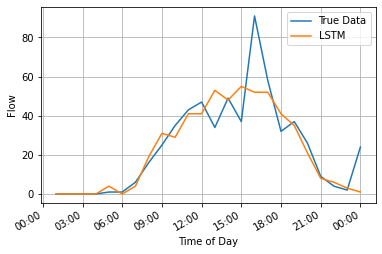

In [ ]:
plot_results(y_test, y_preds)

In [ ]:
eva_regress(y_test, predicted)

explained_variance_score:0.764558
mape:46.506136%
mae:6.458333
mse:125.958333
rmse:11.223116
r2:0.760970
